# Quick start: initializing, adding data, runing and saving your PyWGCNA

First, make sure to [install PyWGCNA](https://github.com/mortazavilab/PyWGCNA#readme).

I encourage you to look at [Data input, cleaning and pre-processing tutorial](Data%20format.md) before running PyWGCNA.

Then, download the data from [here](https://github.com/mortazavilab/PyWGCNA/raw/main/tutorials/5xFAD_paper.zip) and uncompressed it.

For this tutorial, we will be analyzing the TPM matrix of 5xFAD mouse from [MODEL-AD](https://www.model-ad.org/) portal and [this paper](https://www.nature.com/articles/s41597-021-01054-y) in Scientific Data which has 5548 genes and 193 samples in four different time point.

## Setupping up PyWGCNA object

We use the TPM matrix to create a PyWGCNA object. The object serves as a container that contains expression data (i.e. TPM) and analysis (like clustering, or visualizing results) for a RNA-seq dataset. For a technical discussion of the PyWGCNA object structure, check out our [GitHub Wiki](https://github.com/mortazavilab/PyWGCNA/wiki). For example, the raw TPM matrix is stored in `GeneExp` class as a anndata.

In [2]:
import PyWGCNA
geneExp = '5xFAD_paper/expressionList_sorted.csv'
pyWGCNA_5xFAD = PyWGCNA.WGCNA(name='5xFAD', species='mouse', geneExpPath=geneExp, save=True)
pyWGCNA_5xFAD.geneExpr.to_df().head(5)

Saving data to be True, checking requirements ...


ENSMUSG00000000003.15  ENSMUSG00000000028.15  \
sample_id                                                                   
X4mo_cortex_F_5xFADHEMI_430                    0.0                   1.90   
X4mo_cortex_F_5xFADHEMI_431                    0.0                   1.10   
X4mo_cortex_F_5xFADHEMI_433                    0.0                   1.18   
X4mo_cortex_F_5xFADHEMI_434                    0.0                   2.18   
X4mo_cortex_F_5xFADHEMI_511                    0.0                   1.50   

                             ENSMUSG00000000031.16  ENSMUSG00000000037.16  \
sample_id                                                                   
X4mo_cortex_F_5xFADHEMI_430                   0.00                   0.13   
X4mo_cortex_F_5xFADHEMI_431                   0.06                   0.07   
X4mo_cortex_F_5xFADHEMI_433                   0.07                   0.13   
X4mo_cortex_F_5xFADHEMI_434                   0.00                   0.07   
X4mo_cortex_F_5xFADHEMI_511                   0.10                   0.14   

                             ENSMUSG00000000049.11  ENSMUSG00000000056.7  \
sample_id                                                                  
X4mo_cortex_F_5xFADHEMI_430                   0.43             22.370001   
X4mo_cortex_F_5xFADHEMI_431                   0.18             16.990000   
X4mo_cortex_F_5xFADHEMI_433                   1.90             20.370001   
X4mo_cortex_F_5xFADHEMI_434                   0.31             17.980000   
X4mo_cortex_F_5xFADHEMI_511                   0.53             18.350000   

                             ENSMUSG00000000058.6  ENSMUSG00000000078.7  \
sample_id                                                                 
X4mo_cortex_F_5xFADHEMI_430             24.240000             19.320000   
X4mo_cortex_F_5xFADHEMI_431             24.690001             23.879999   
X4mo_cortex_F_5xFADHEMI_433             28.059999             21.330000   
X4mo_cortex_F_5xFADHEMI_434             21.459999             15.060000   
X4mo_cortex_F_5xFADHEMI_511             20.180000             18.660000   

                             ENSMUSG00000000085.16  ENSMUSG00000000088.7  ...  \
sample_id                                                                 ...   
X4mo_cortex_F_5xFADHEMI_430              33.410000            620.450012  ...   
X4mo_cortex_F_5xFADHEMI_431              31.400000            705.729980  ...   
X4mo_cortex_F_5xFADHEMI_433              32.139999            699.500000  ...   
X4mo_cortex_F_5xFADHEMI_434              27.600000            639.950012  ...   
X4mo_cortex_F_5xFADHEMI_511              26.430000            640.549988  ...   

                             ENSMUSG00000118383.1  ENSMUSG00000118384.1  \
sample_id                                                                 
X4mo_cortex_F_5xFADHEMI_430                  0.75                   0.0   
X4mo_cortex_F_5xFADHEMI_431                  0.67                   0.0   
X4mo_cortex_F_5xFADHEMI_433                  0.91                   0.0   
X4mo_cortex_F_5xFADHEMI_434                  0.11                   0.0   
X4mo_cortex_F_5xFADHEMI_511                  0.64                   0.0   

                             ENSMUSG00000118385.1  ENSMUSG00000118386.1  \
sample_id                                                                 
X4mo_cortex_F_5xFADHEMI_430                  0.00                  0.00   
X4mo_cortex_F_5xFADHEMI_431                  0.55                  0.43   
X4mo_cortex_F_5xFADHEMI_433                  0.00                  0.19   
X4mo_cortex_F_5xFADHEMI_434                  0.00                  0.00   
X4mo_cortex_F_5xFADHEMI_511                  1.38                  0.00   

                             ENSMUSG00000118387.1  ENSMUSG00000118388.1  \
sample_id                                                                 
X4mo_cortex_F_5xFADHEMI_430                   0.0                   0.0   
X4mo_cortex_F_5xFADHEMI_431                  

## Pre-processing workflow

PyWGCNA allows you to easily preproces the data including removing genes with too many missing values or really low expressed across samples(in default we suggest to remove genes without any expression more than 1 TPM) and also removing samples with too many missing values or not matched with. keep in your mind you can change criteria of removing outlier genes or sample by changing `TPMcutoff` and `cut`

Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



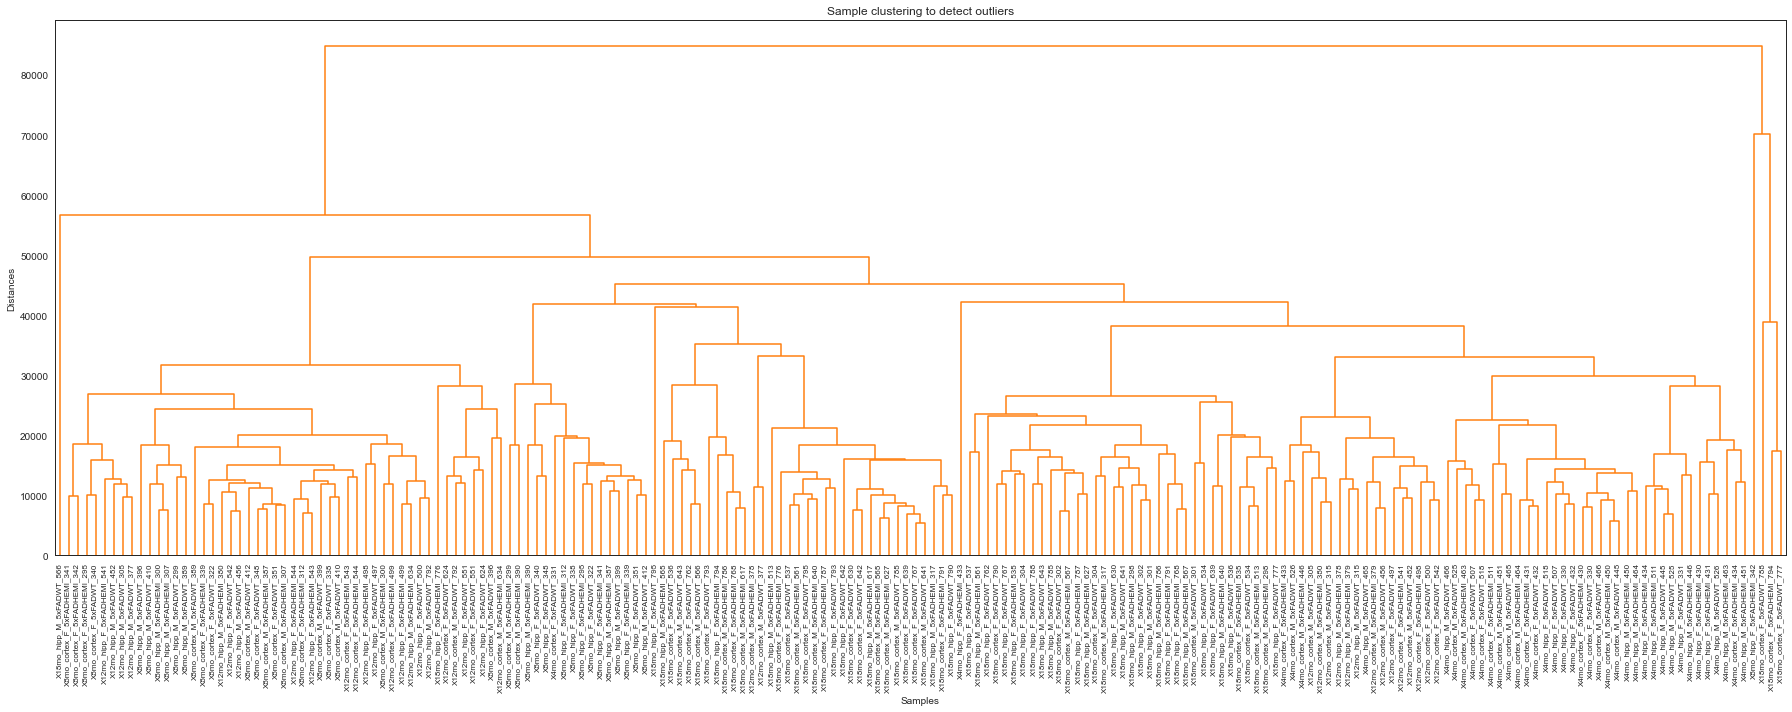

In [3]:
pyWGCNA_5xFAD.preprocess()

## Construction of the gene network and identification of modules

PyWGCNA compress all the steps of network construction and module detection in one function called `findModules` including:
1. Choosing the soft-thresholding power: analysis of network topology
2. Co-expression similarity and adjacency
3. Topological Overlap Matrix (TOM)
4. Clustering using TOM
5. Merging of modules whose expression profiles are very similar

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  1876
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.368857 -0.481613       0.701585  2444.750755  2260.416617   
1       2    0.7253  -0.99165       0.886361   840.665489   673.081242   
2       3  0.791986 -1.194264       0.946969   385.685335   258.451266   
3       4  0.835392   -1.3419       0.968446   207.404152   113.456084   
4       5  0.853842 -1.472183       0.973346   123.232581    54.784481   
5       6  0.870673 -1.553348       0.979584    78.455923    28.471239   
6       7  0.886736 -1.600869       0.986635    52.572016    15.594822   
7       8  0.896672 -1.639343       0.992373     36.65884     9.454046   
8       9  0.903531 -1.677747       0.994643    26.397061      6.02443   
9      10  0.906045 -1.706474       0.995895    19.521431     3.975959   
10     11  0.905582 -1.731076       0.994806    14.767291     2.623921   
11     13

Trying to set attribute `.var` of view, copying.


	Done..

Calculating 34 module eigengenes in given set...
	Done..

mergeCloseModules: Merging modules whose distance is less than 0.2
fixDataStructure: data is not a Dictionary: converting it into one.
multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 34 module eigengenes in given set...
	Done..

multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 33 module eigengenes in given set...
	Done..

multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 31 module eigengenes in given set...
	Done..

multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 30 module eigengenes in given set...
	Done..

  Calculating new MEs...
multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 30 module eigengenes in given set...
	Done..

Calculating 30 module eigengenes in given set...
	Done..

fixDataStructure: data is not a Dictionary: converting it into one.
orderMEs: order not given, calculating using given set 0


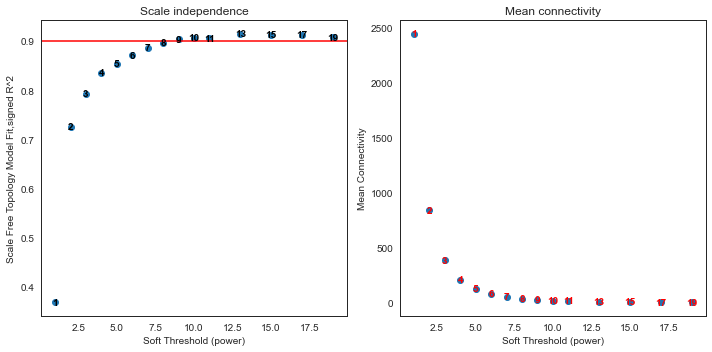

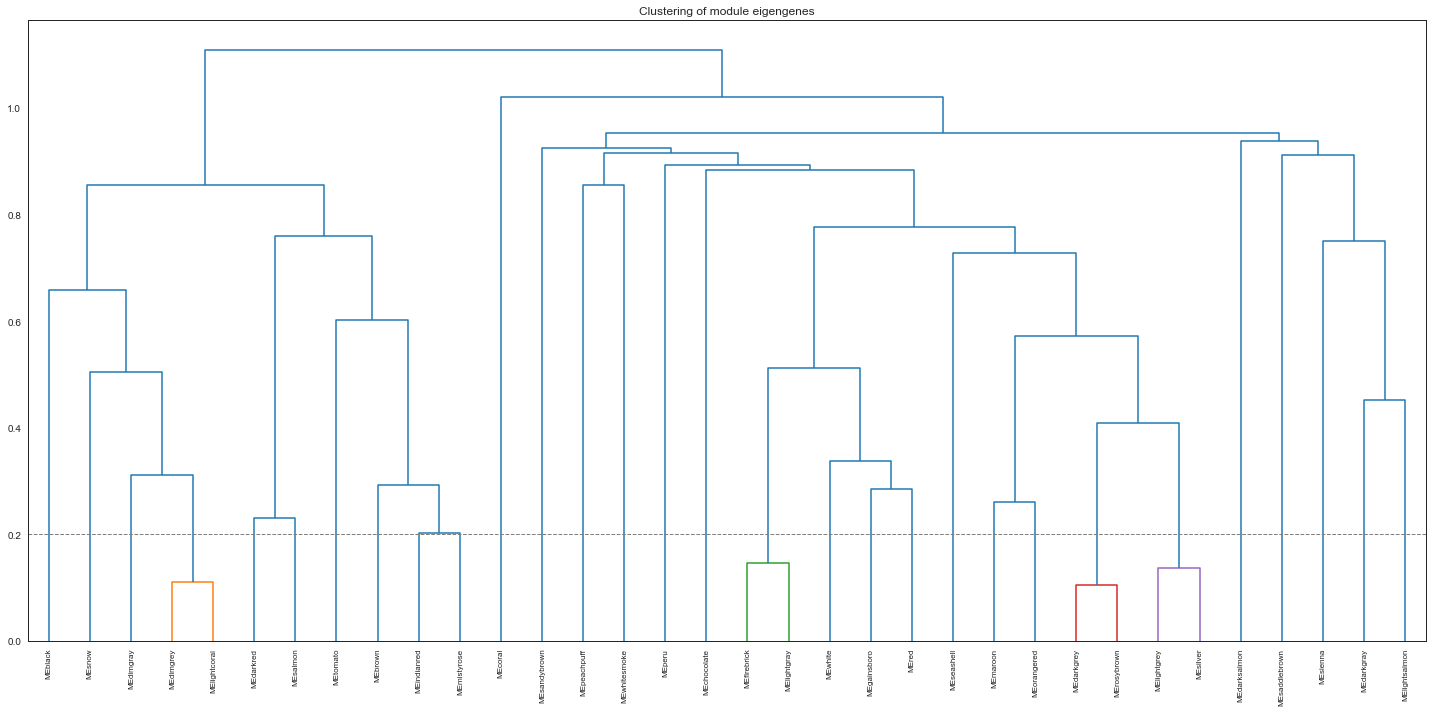

In [4]:
pyWGCNA_5xFAD.findModules()

We also can merge two previous steps by calling `runWGCNA()` function.

## Relating modules to external information and identifying important genes
PyWGCNA gather some important analysis after identifying modules in `analyseWGCNA()` function including:

1. Quantifying module–trait relationship 
2. Gene relationship to trait and modules

keep in your mind before start analysing don't forget to add any information you have about samples or genes.

For showing module relationship heatmap, PyWGCNA needs user to indicate color from [Matplotlib colors](https://matplotlib.org/stable/gallery/color/named_colors.html) for metadata by using `setMetadataColor()` function.

You also can select which data Trait in which order you wish to show in module eigen gene heatmap

Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

Updating gene information based on given gene list ...
	Done..

plotting module heatmap eigengene...
	Done..

plotting module barplot eigengene...
	Done..

doing Go term analysis for each module...


2022-09-06 12:29:33,612 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.5
2022-09-06 12:29:59,539 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.5


	Done..



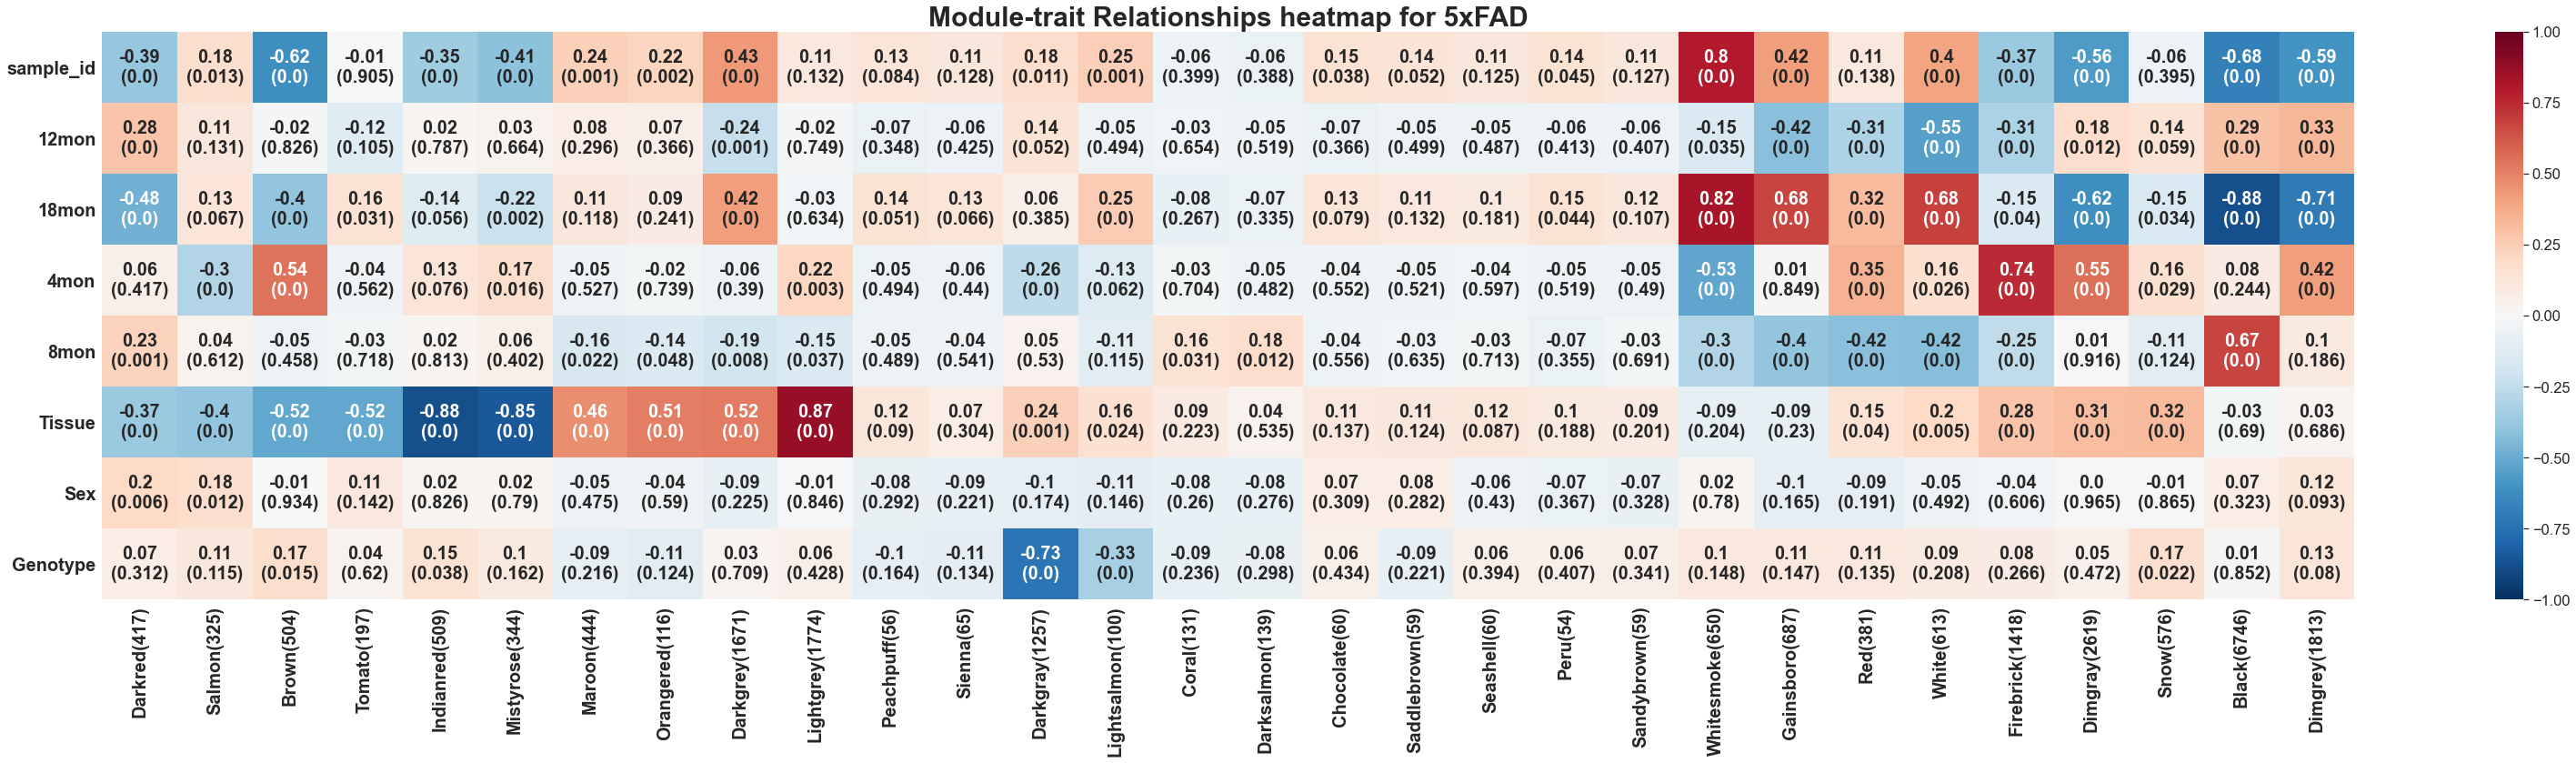

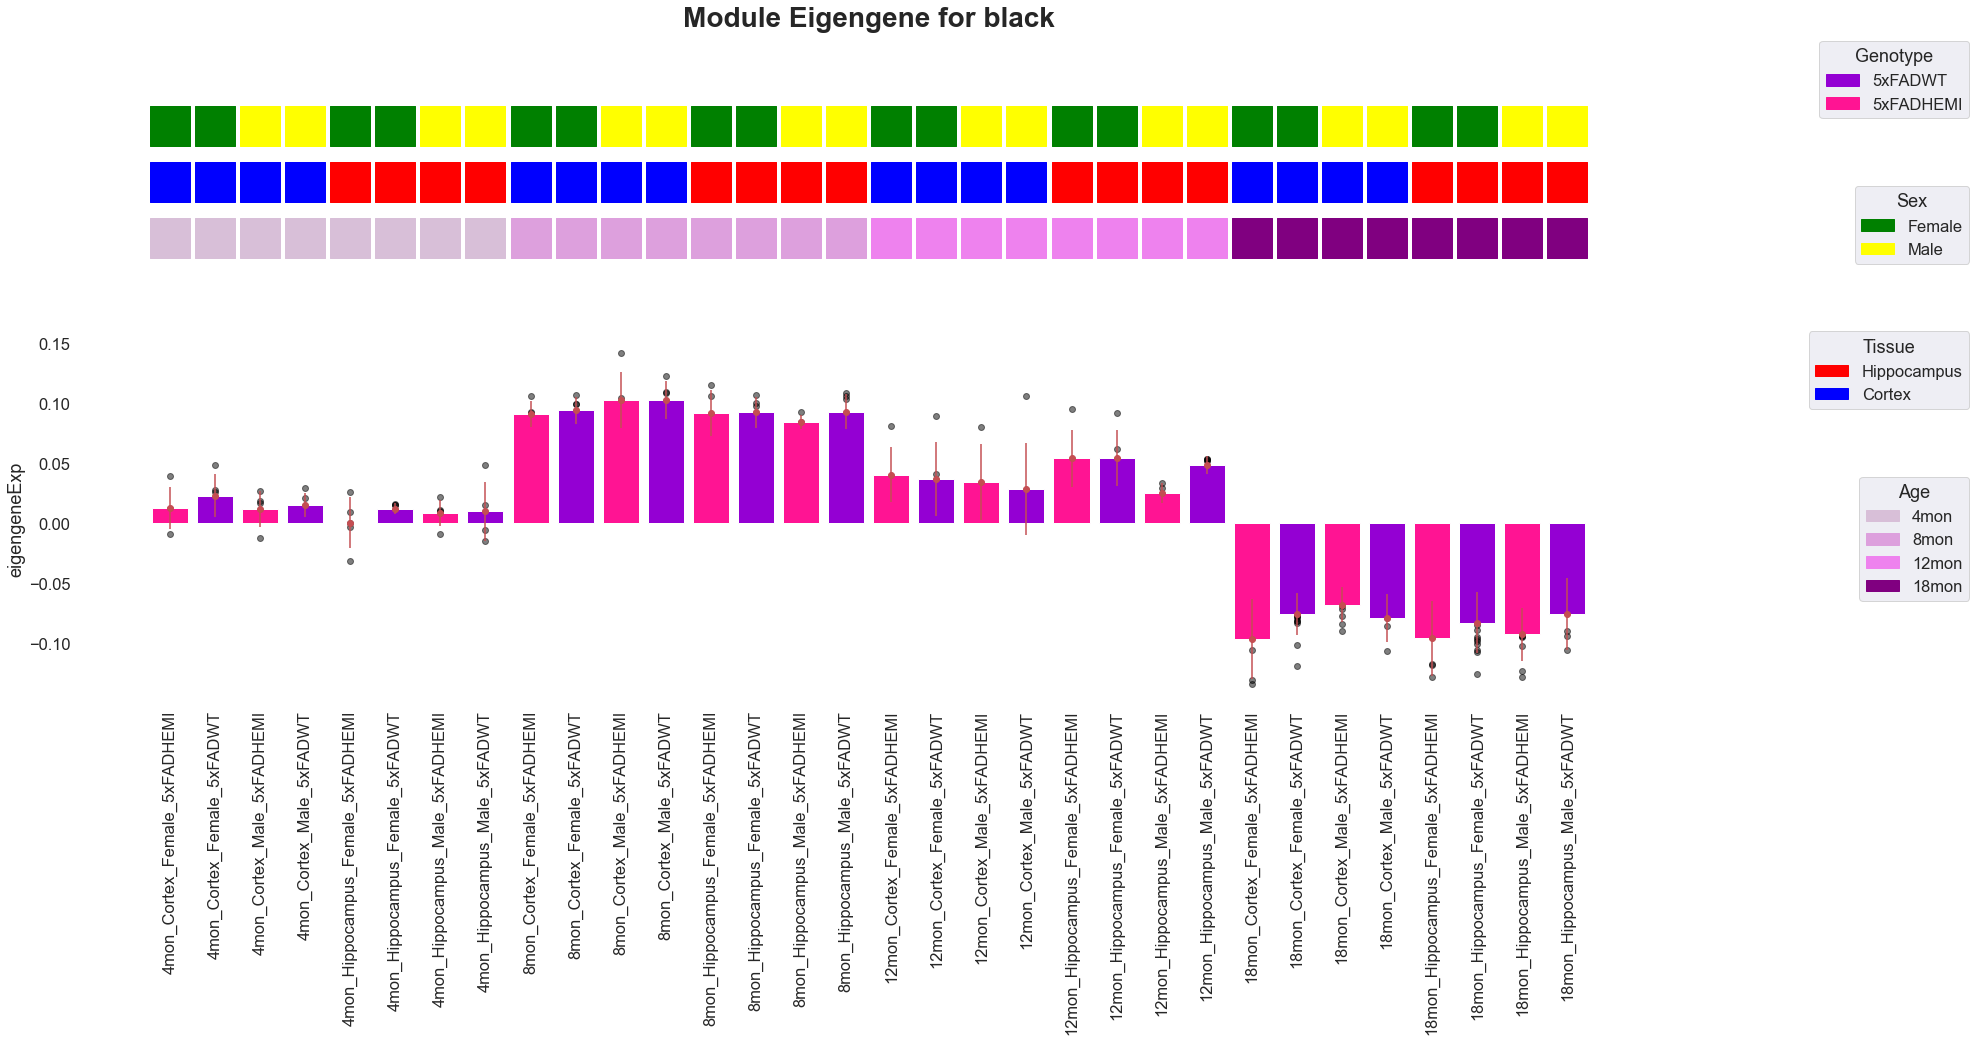

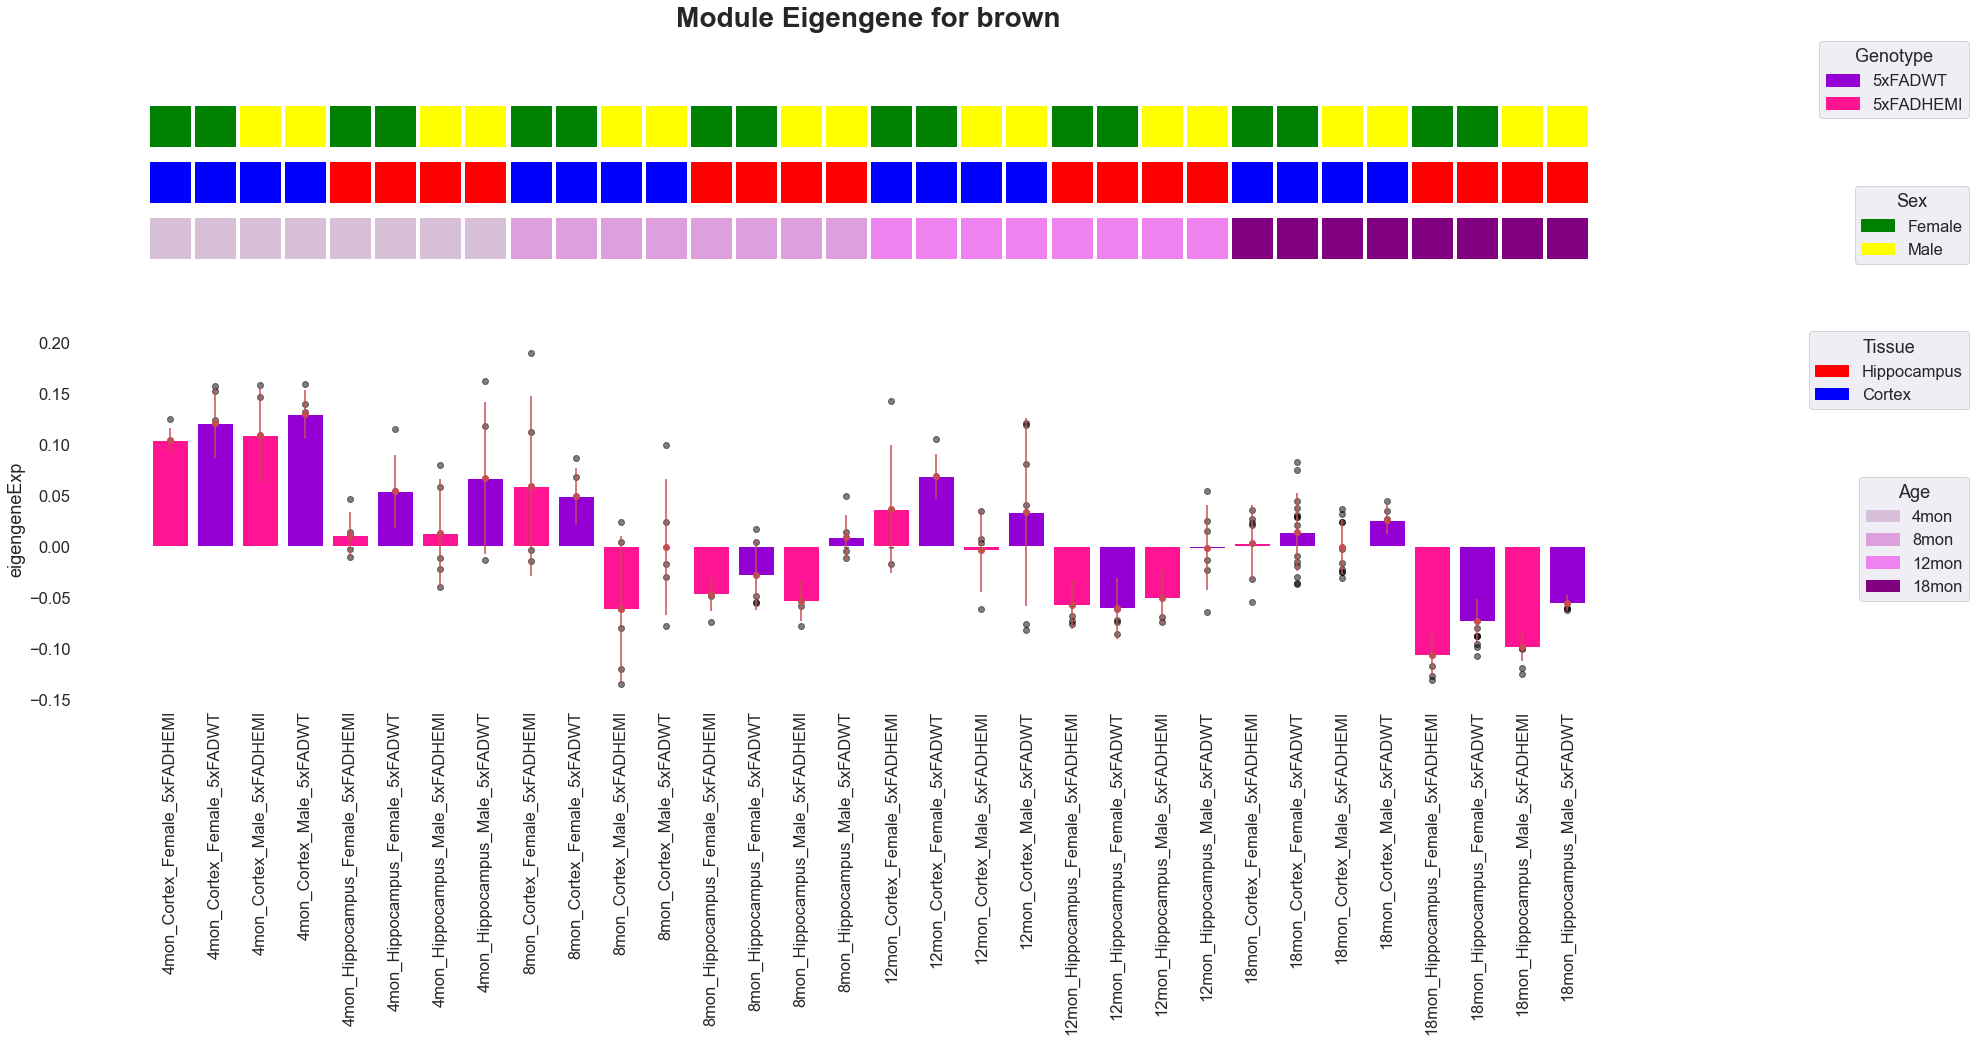

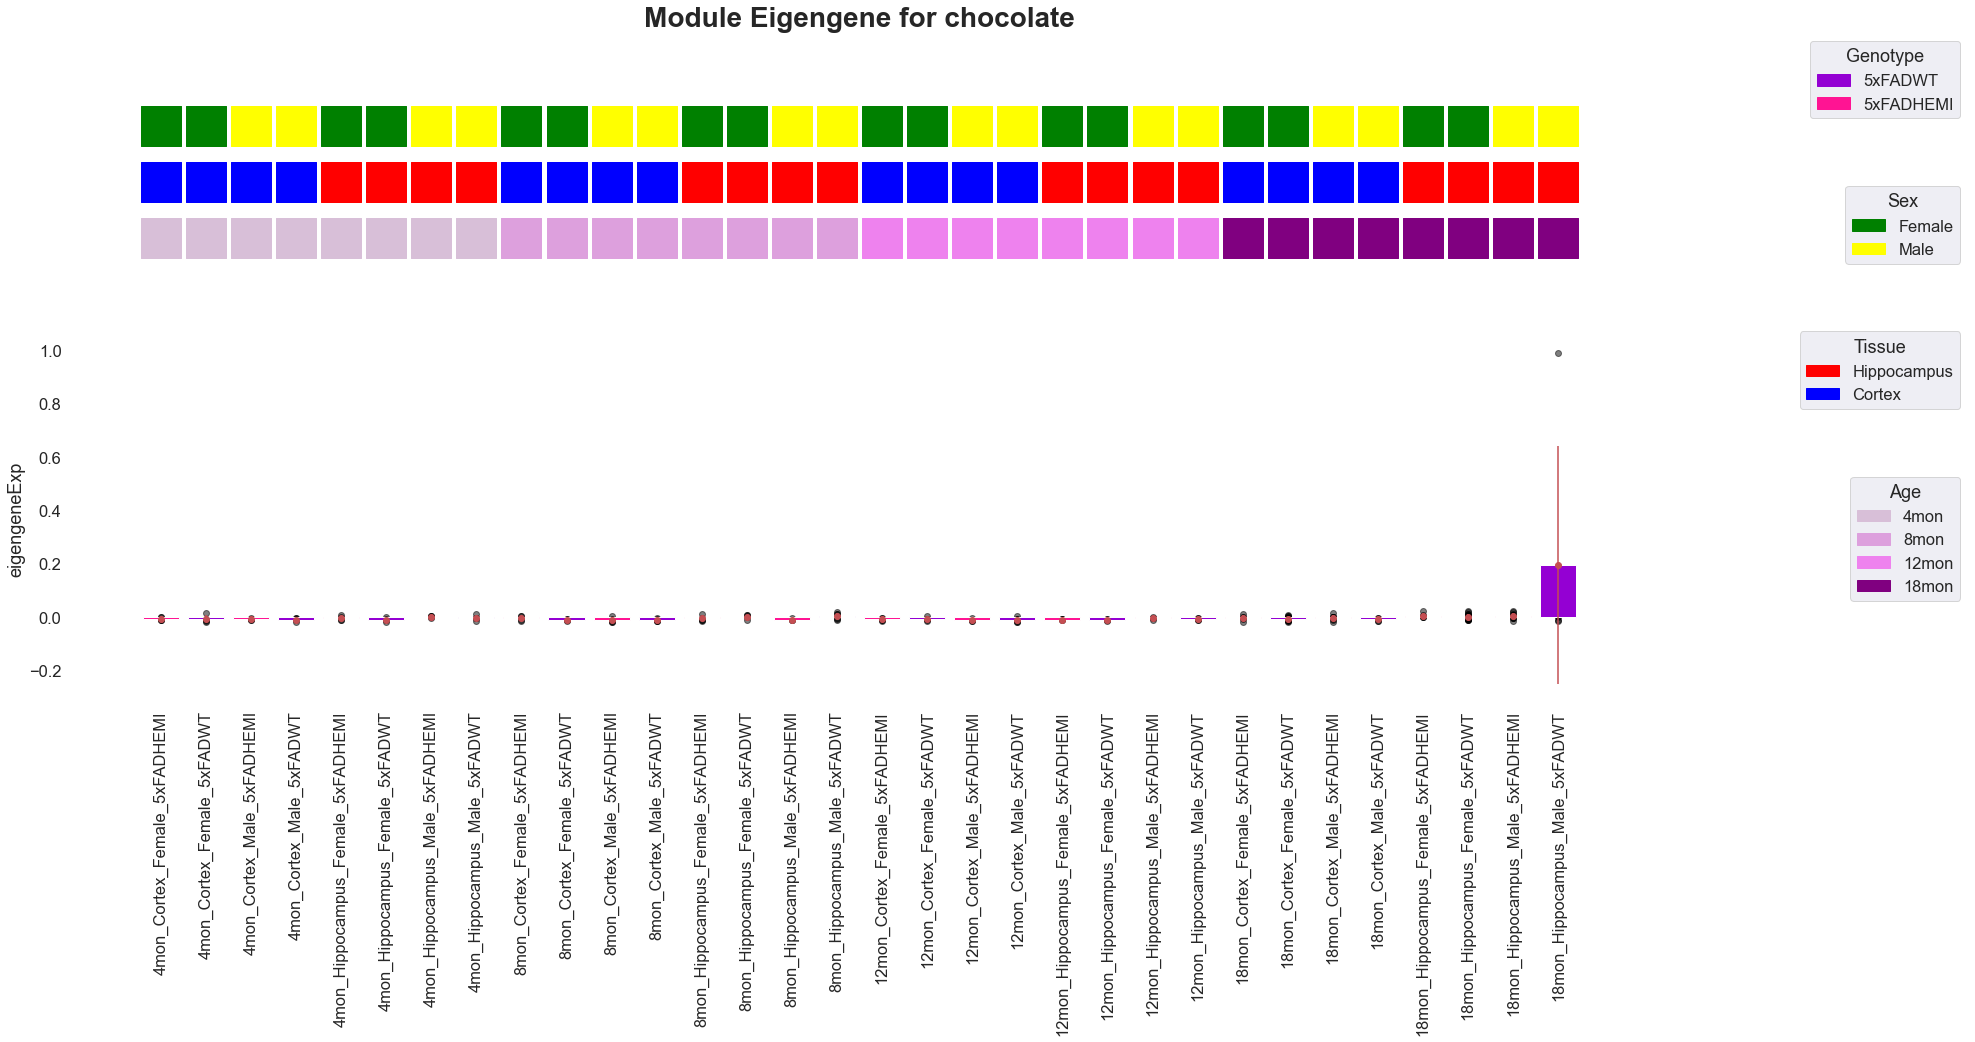

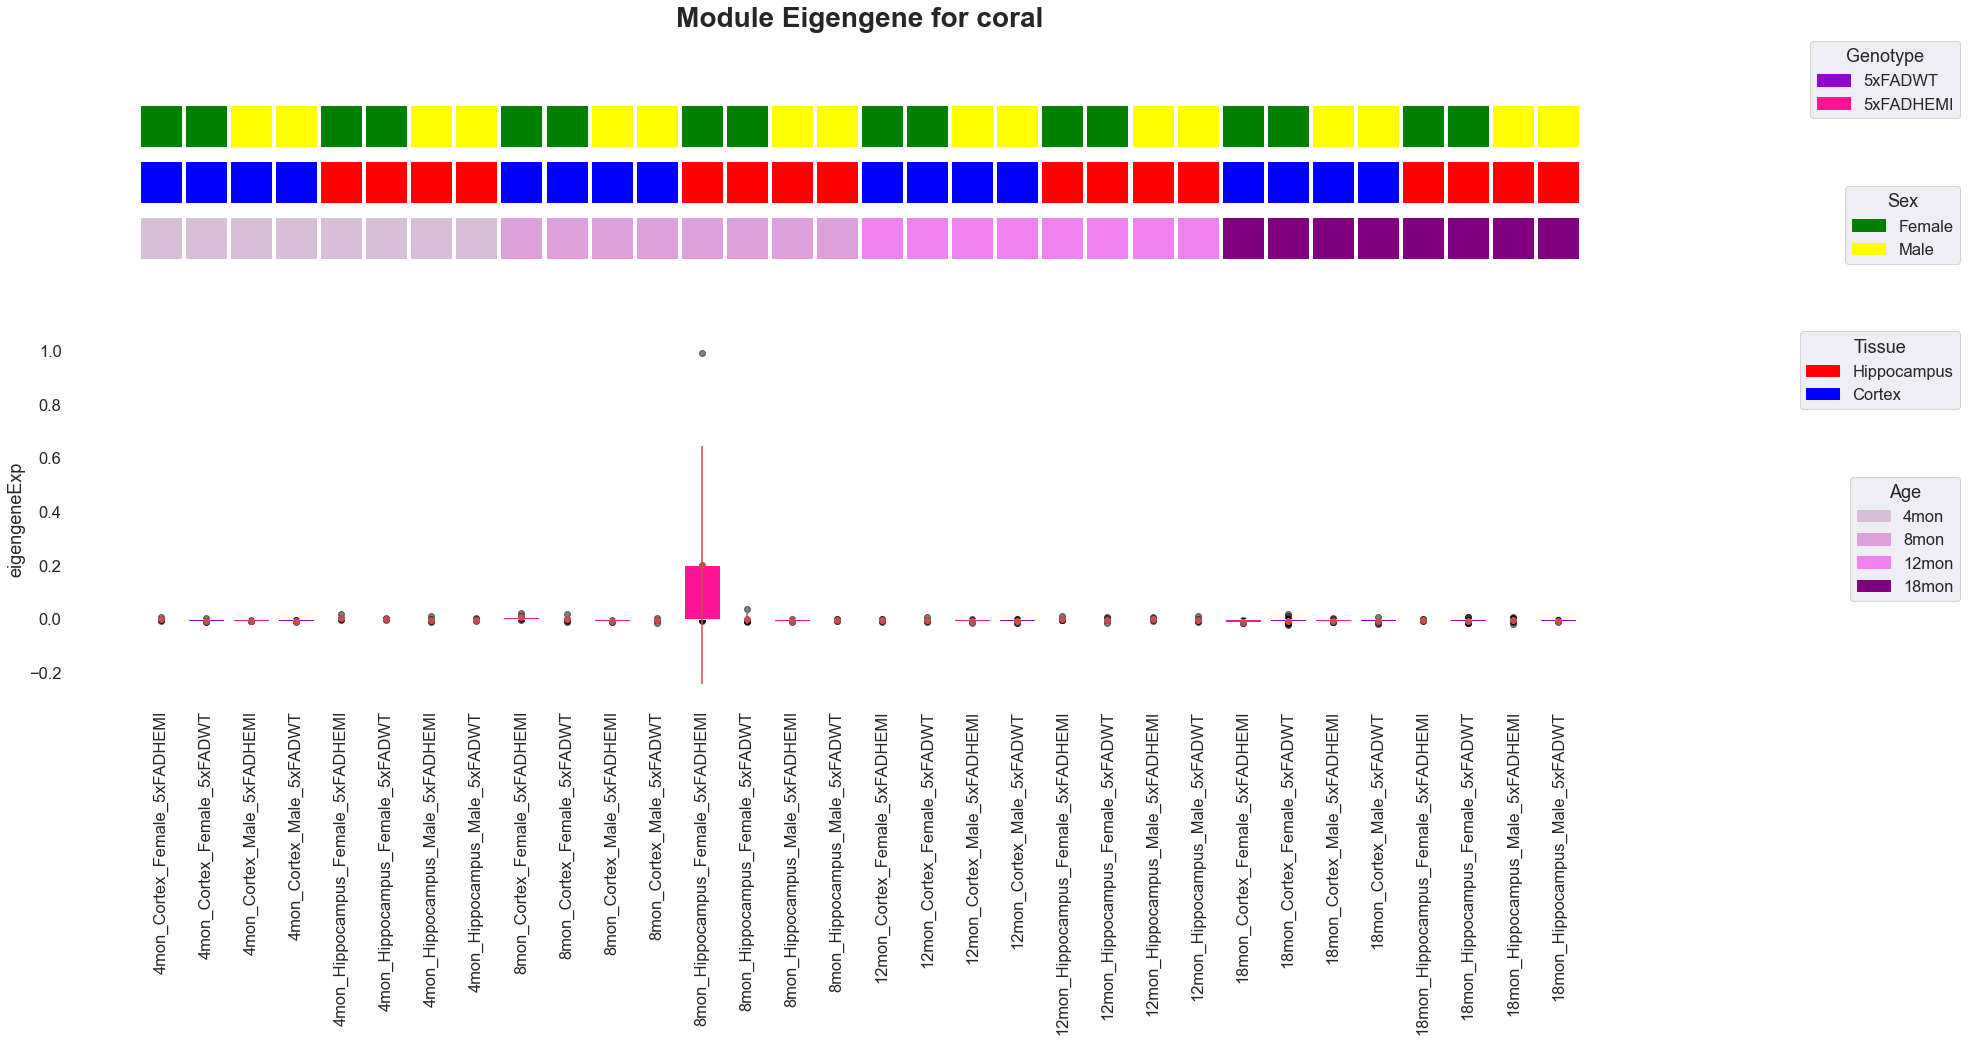

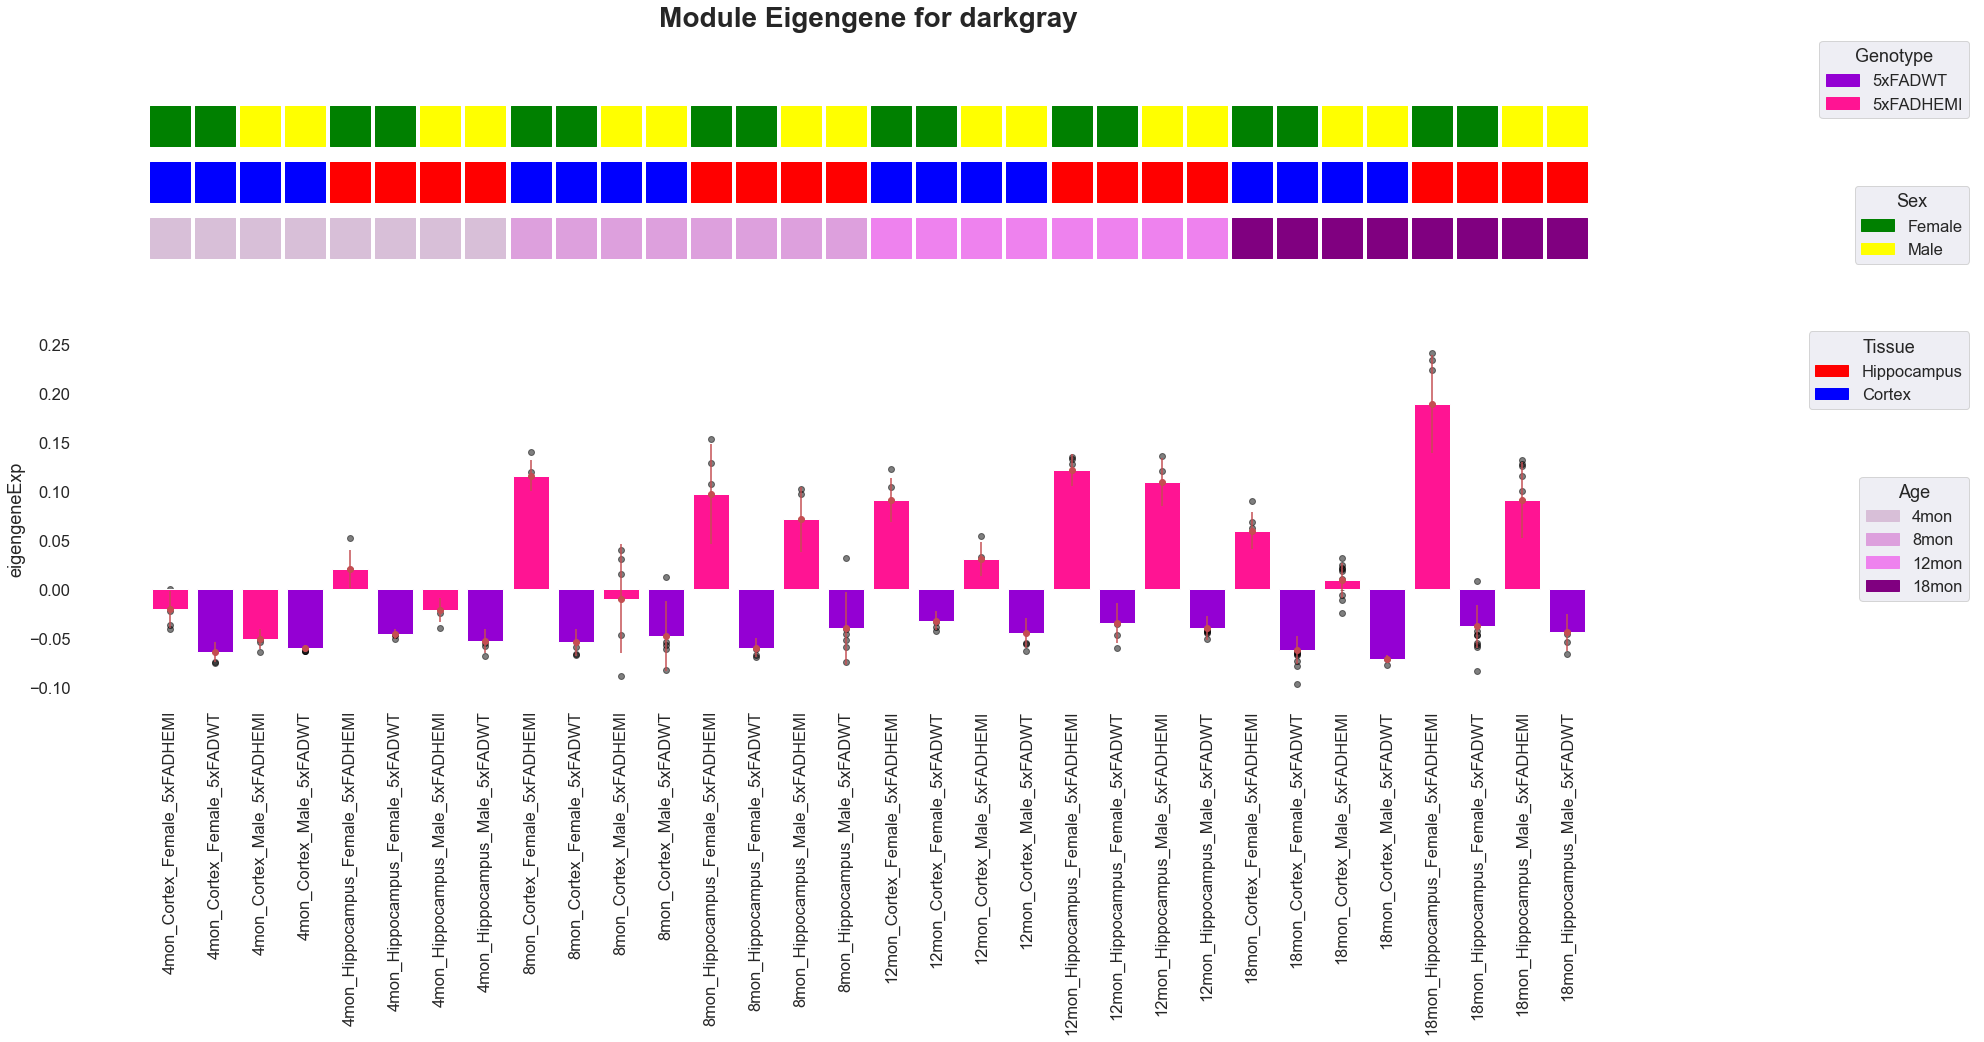

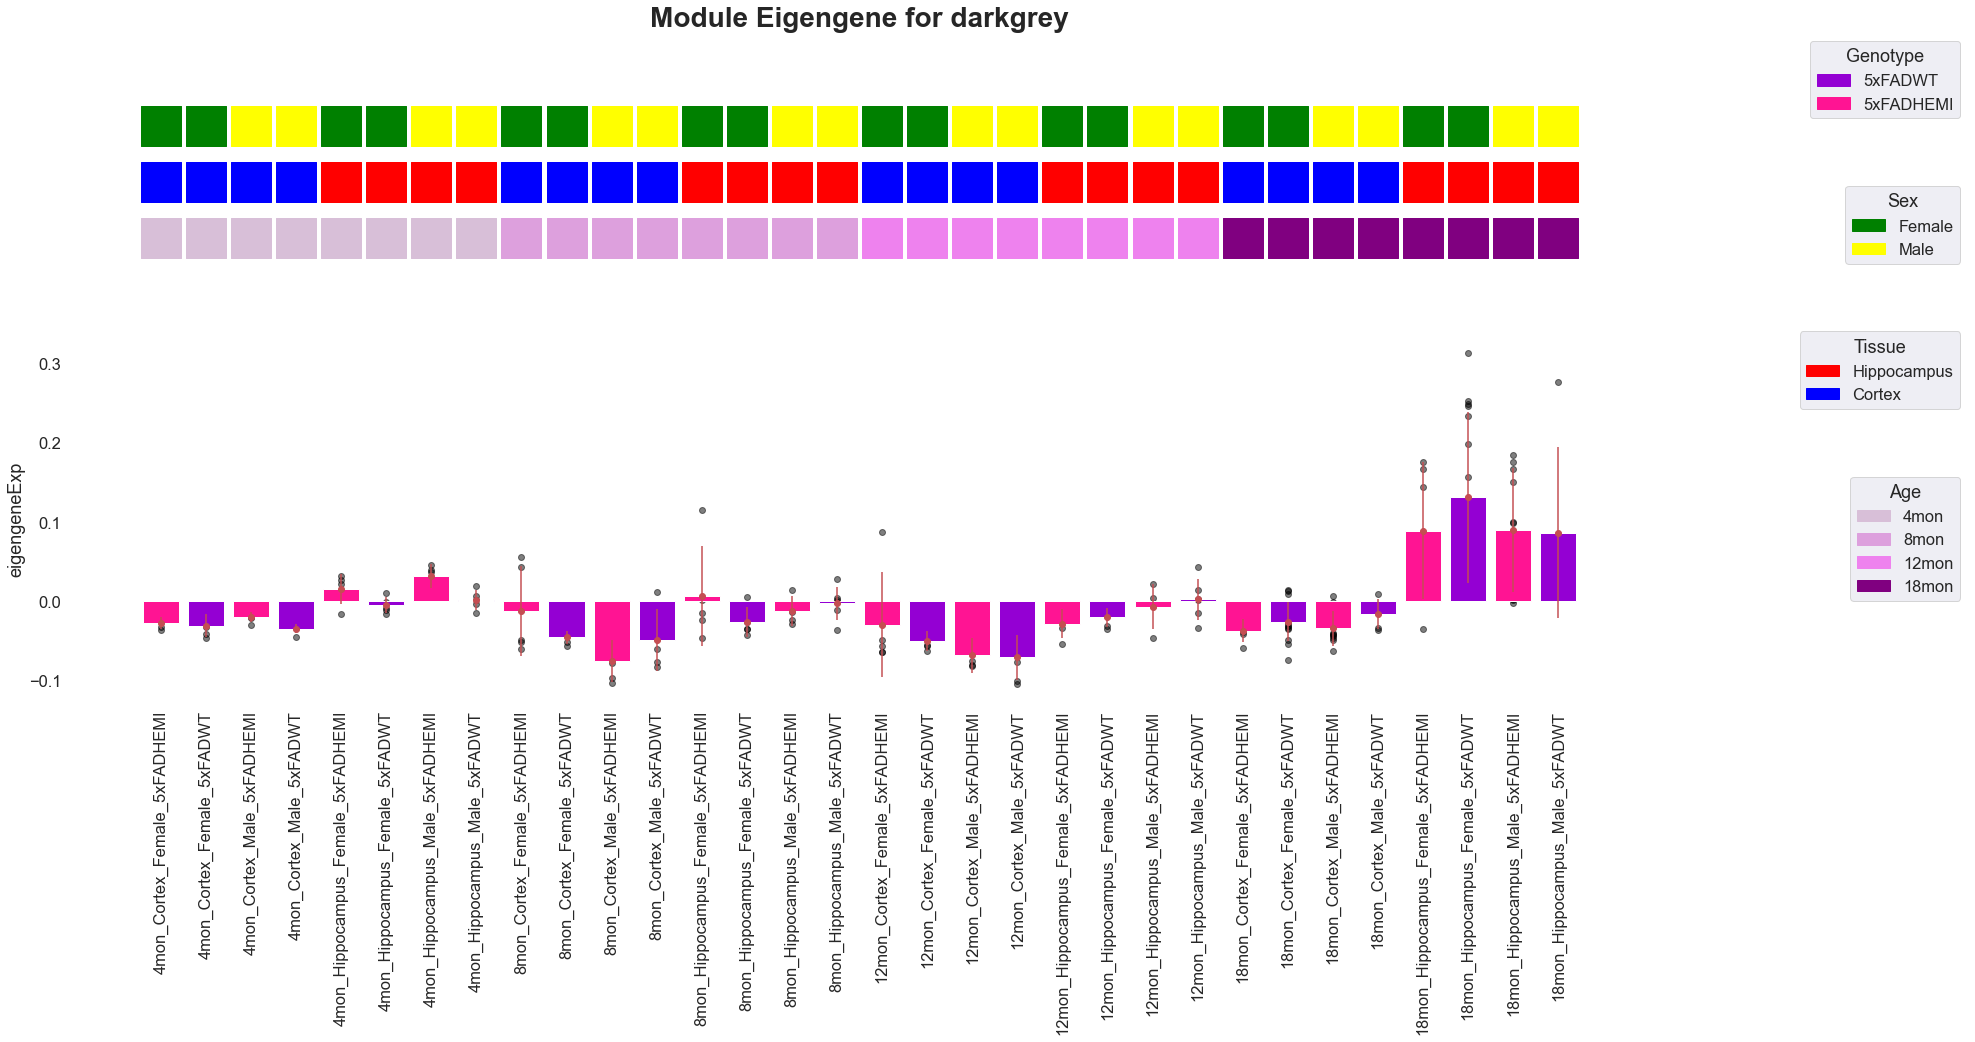

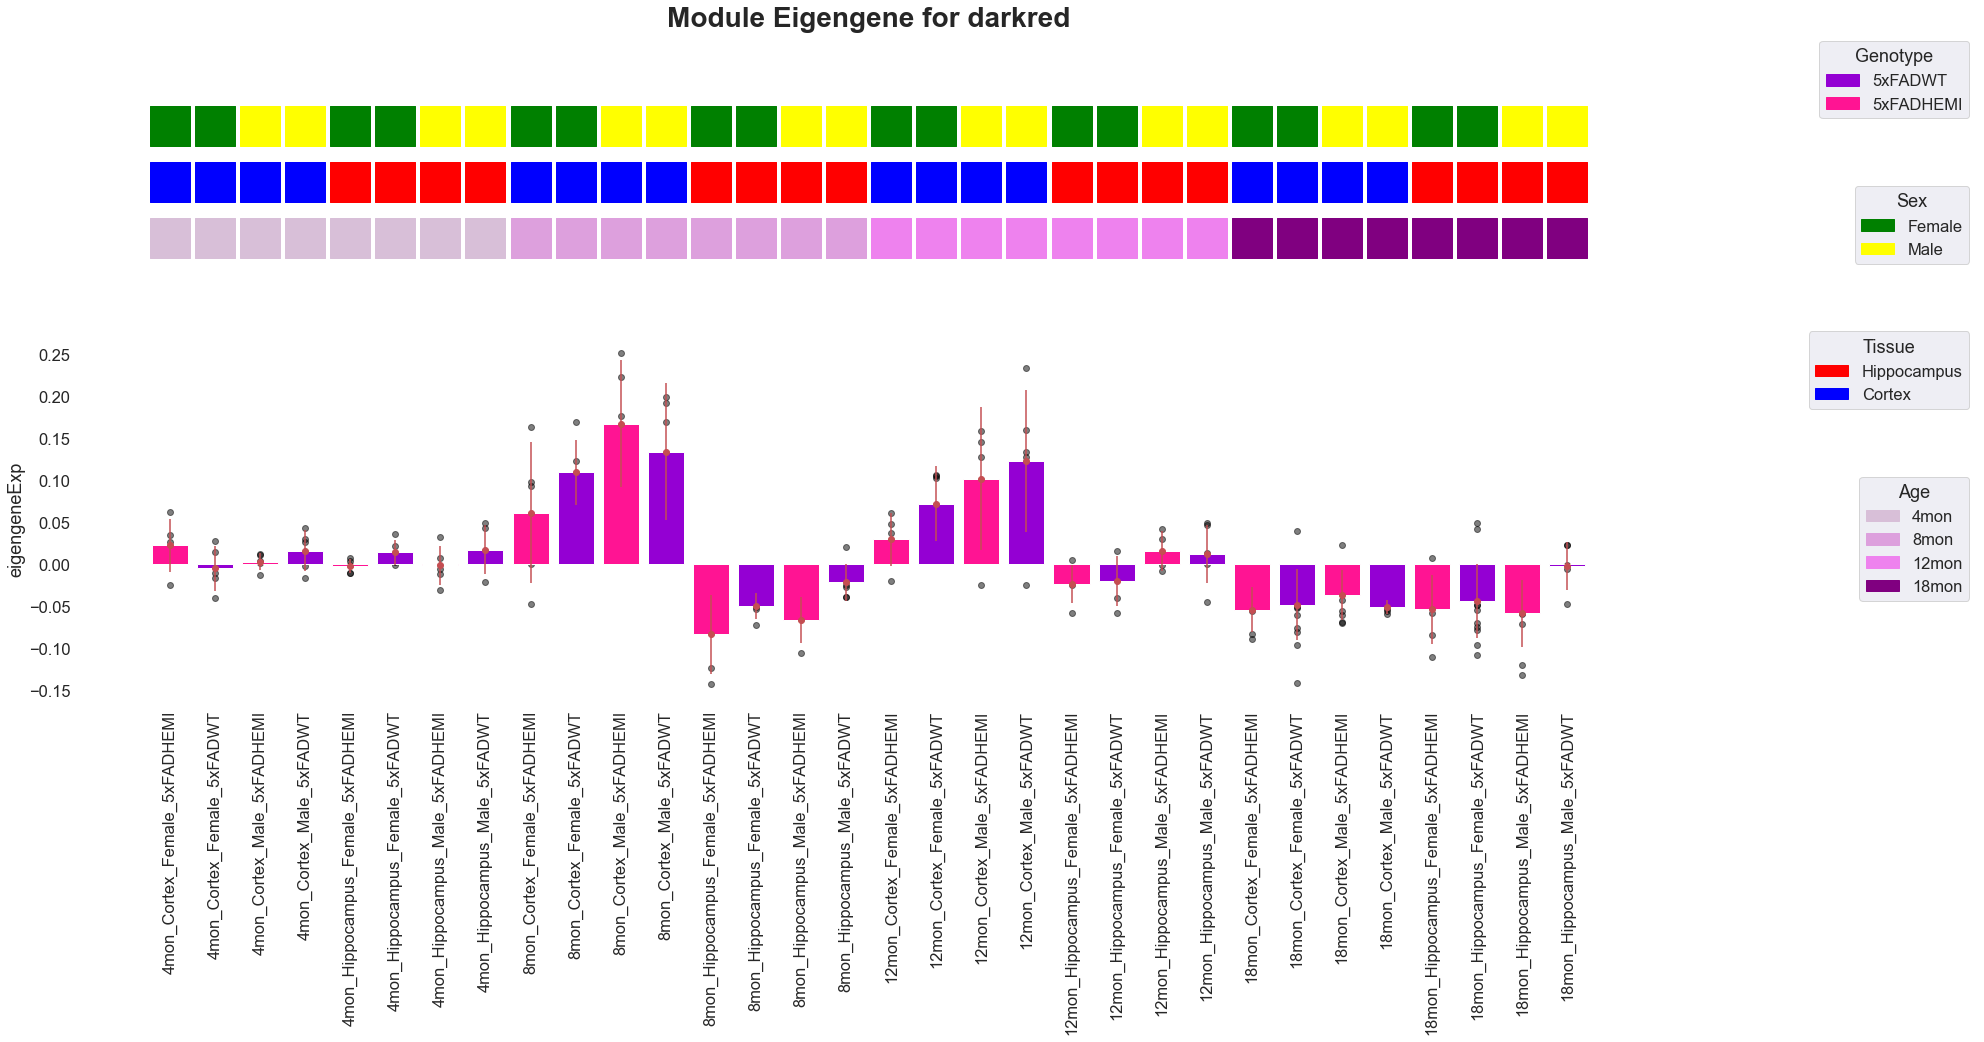

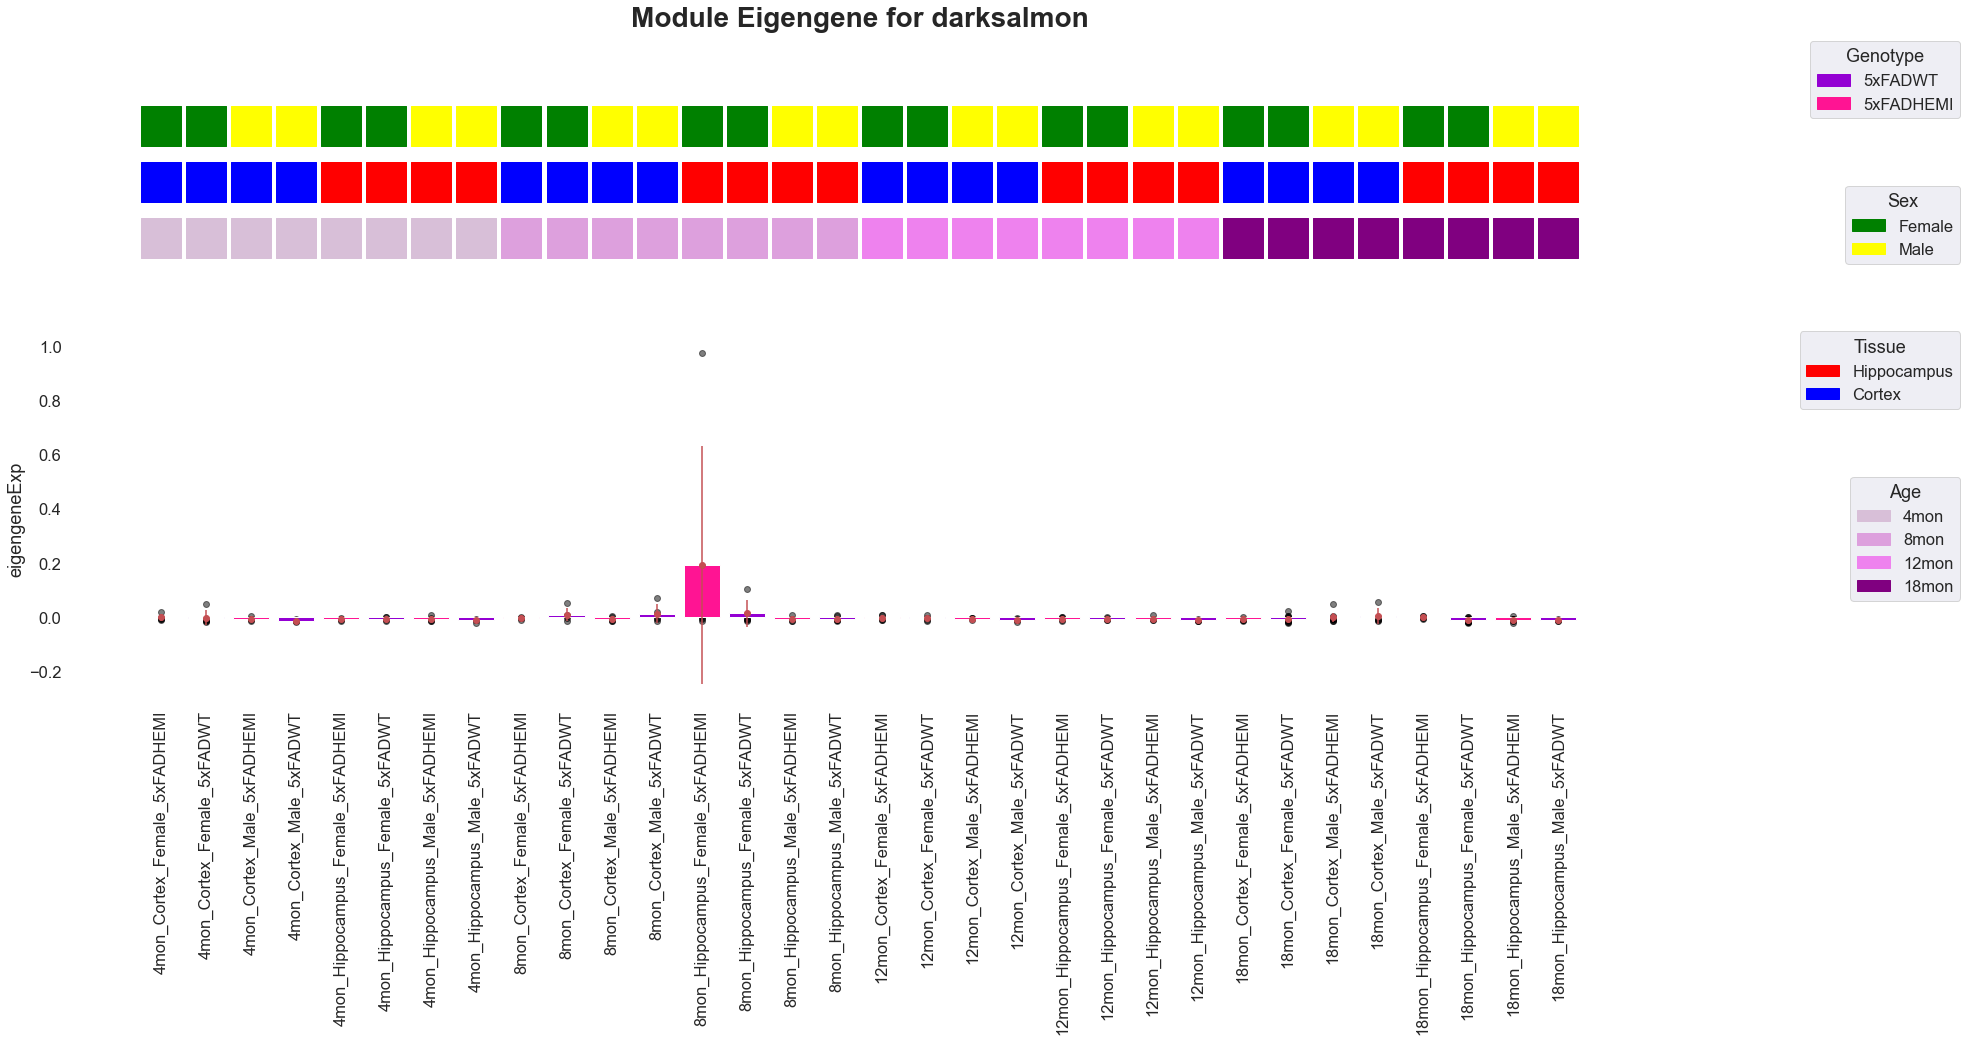

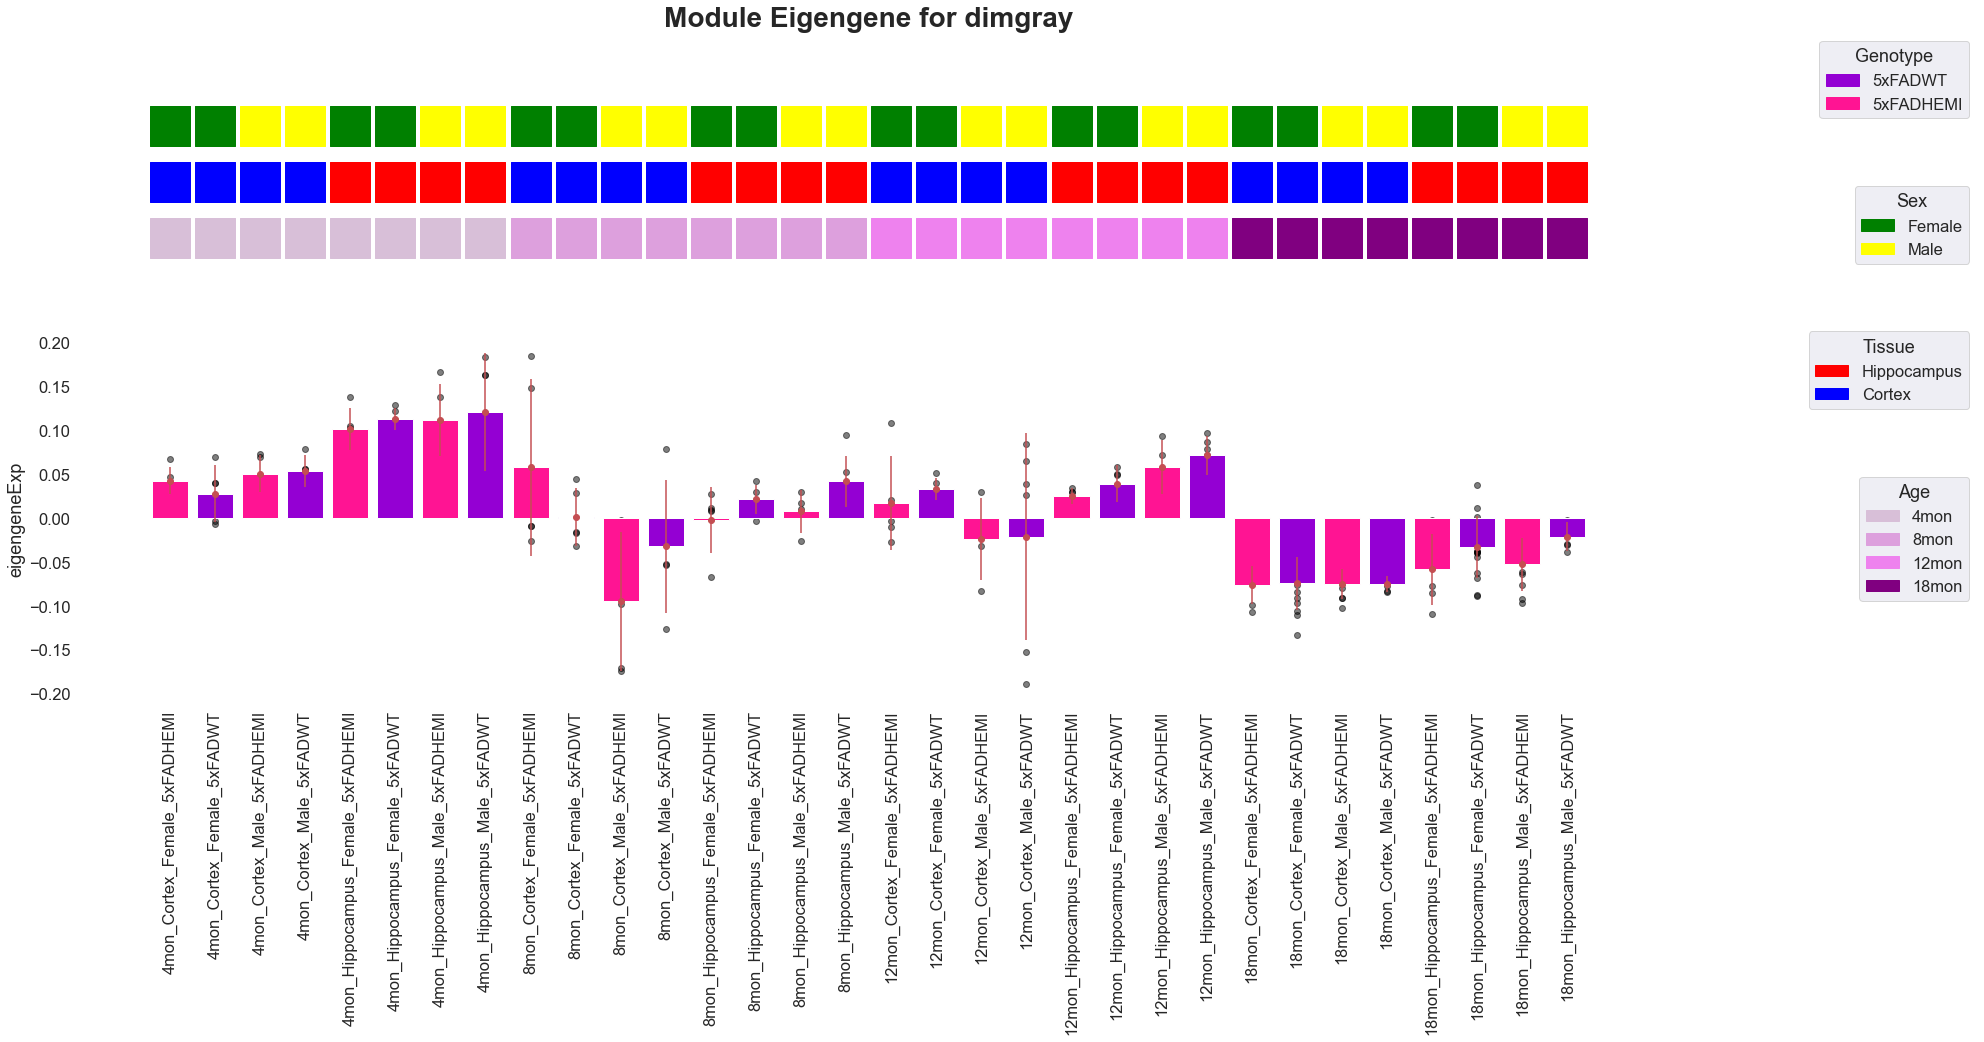

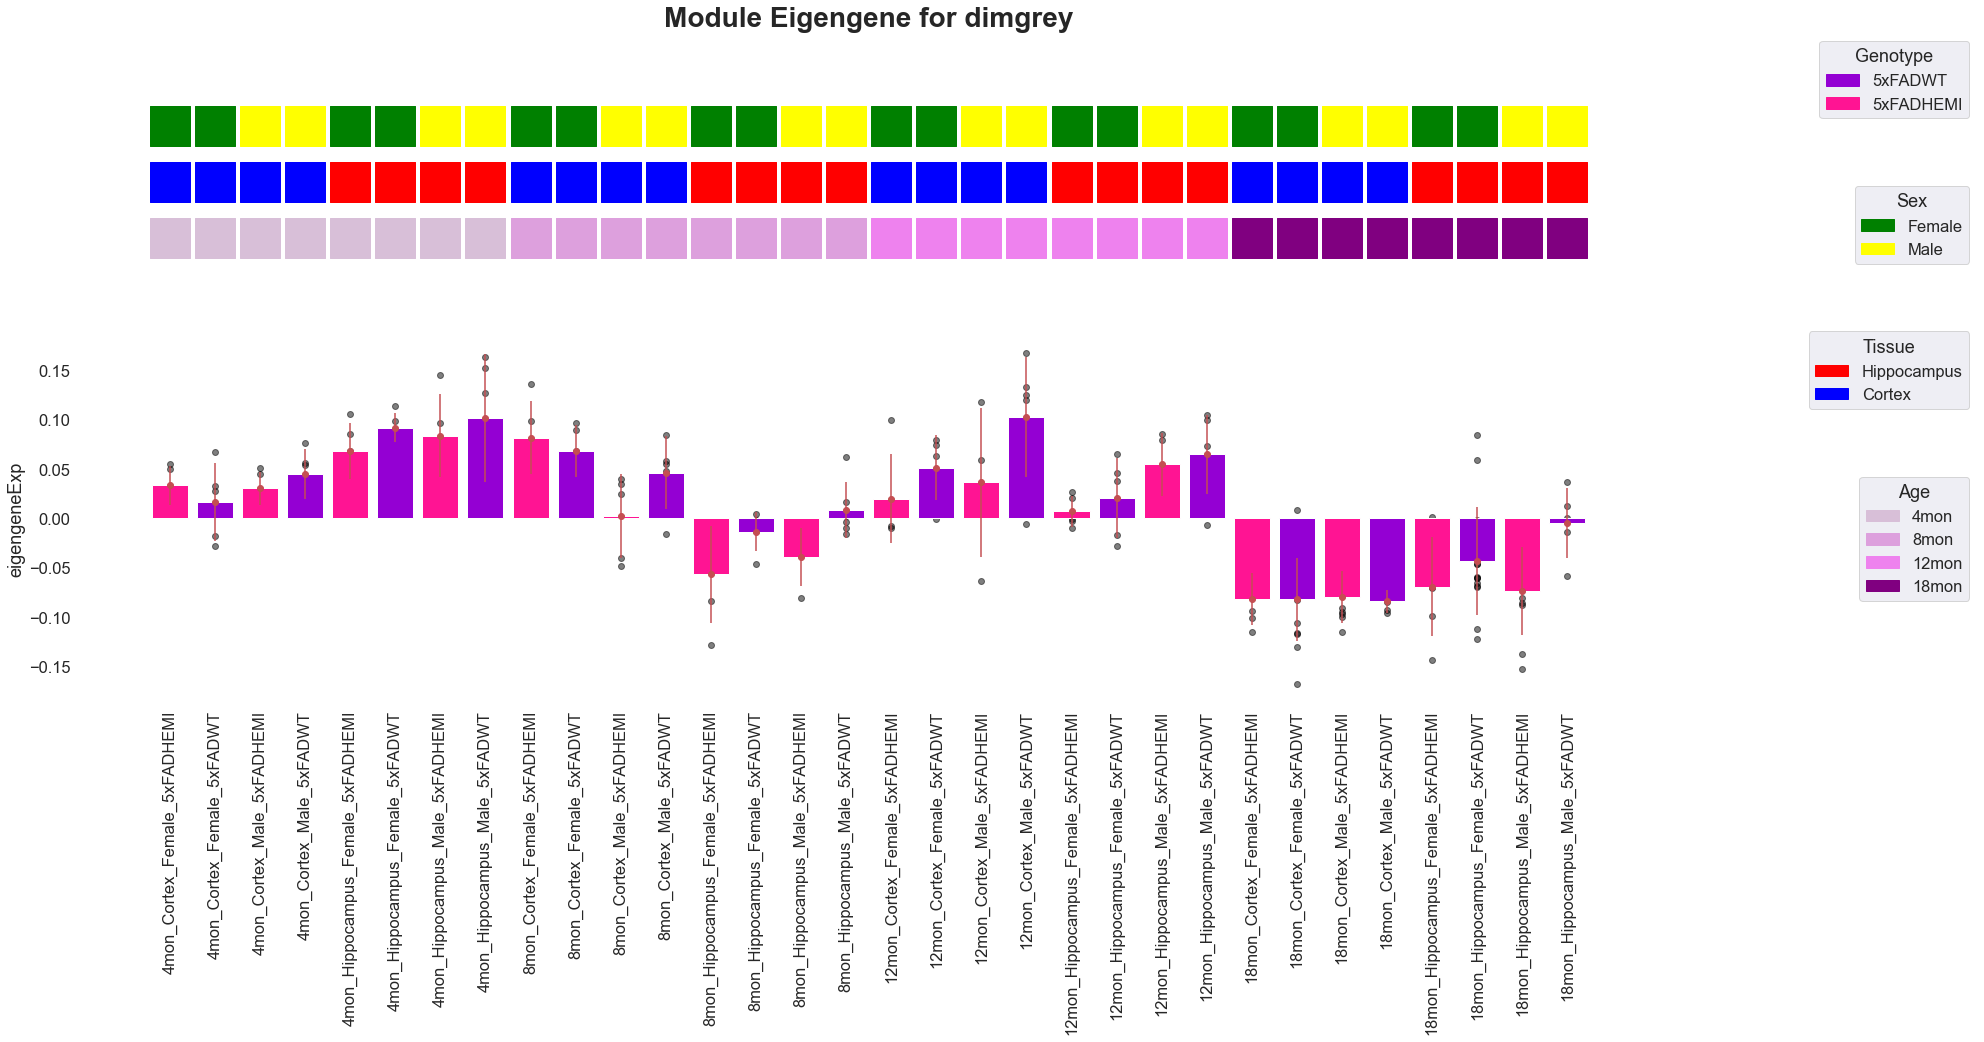

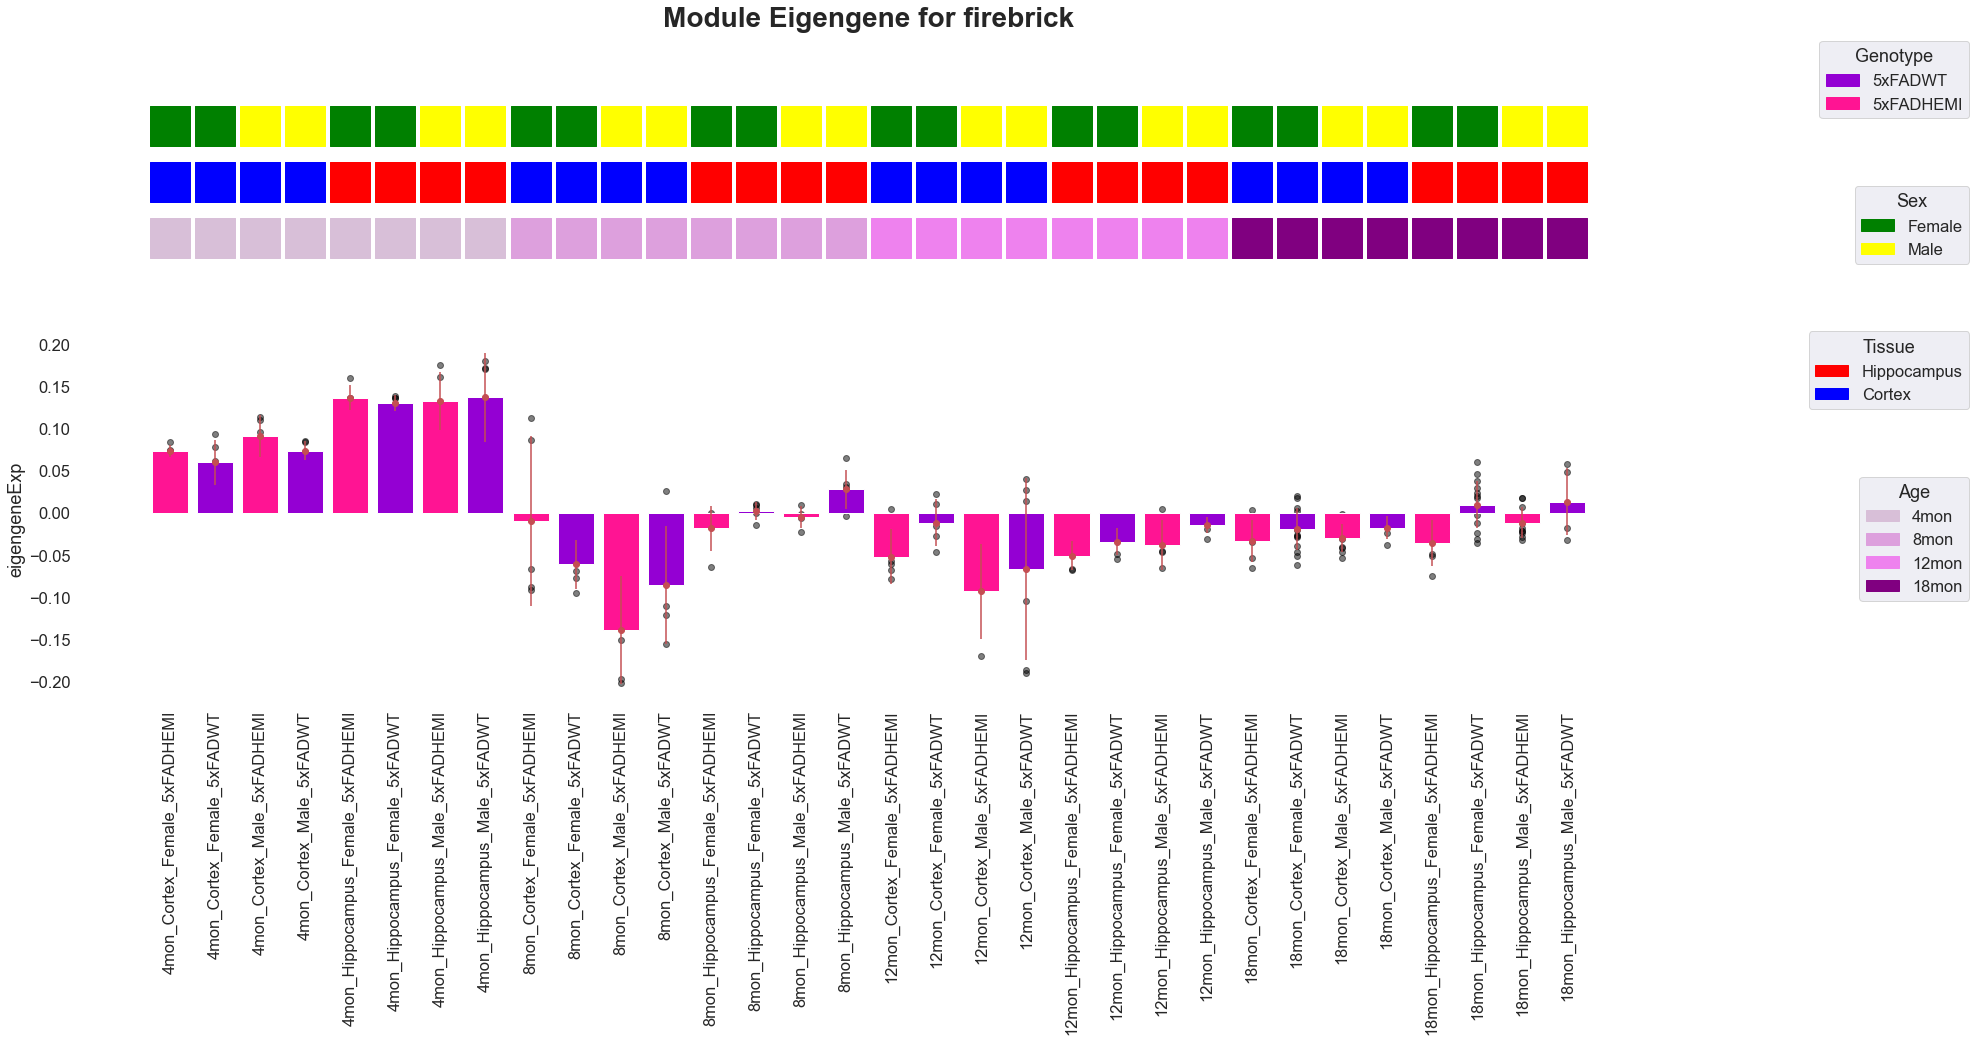

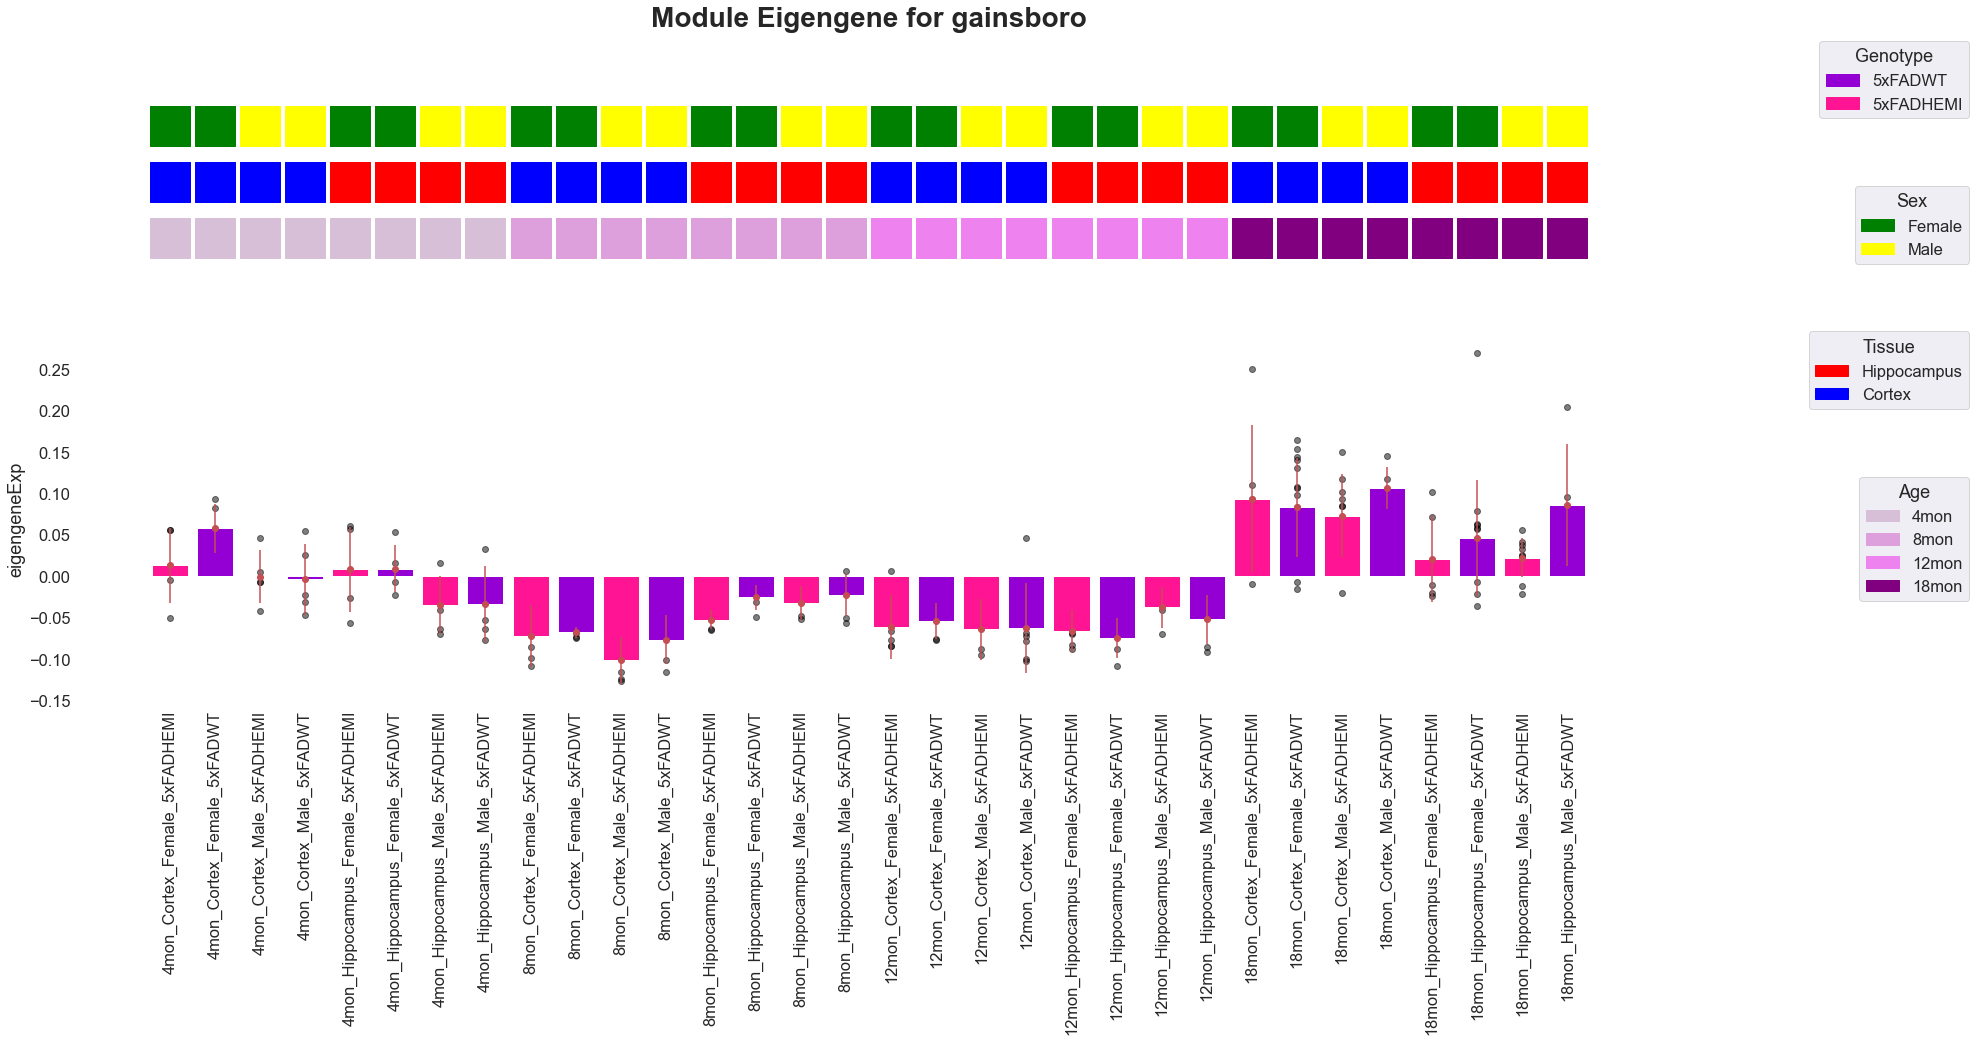

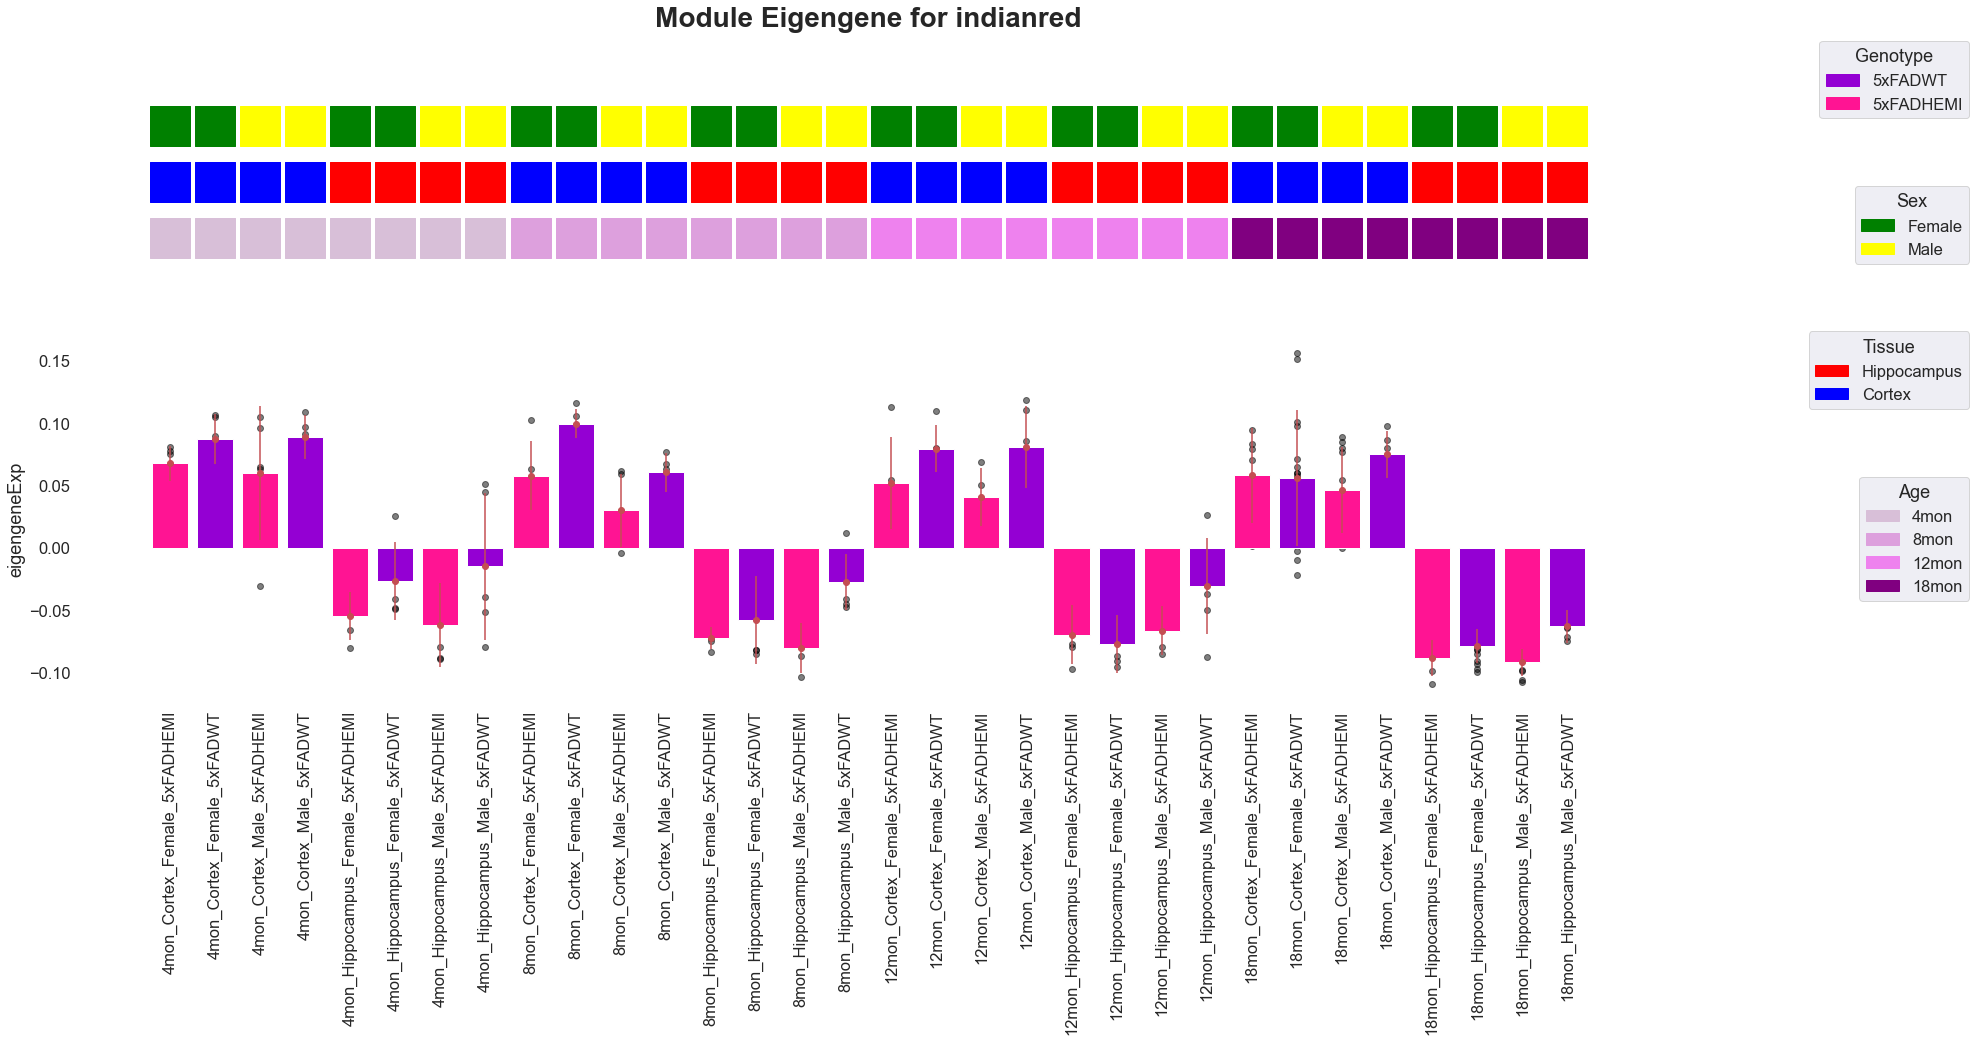

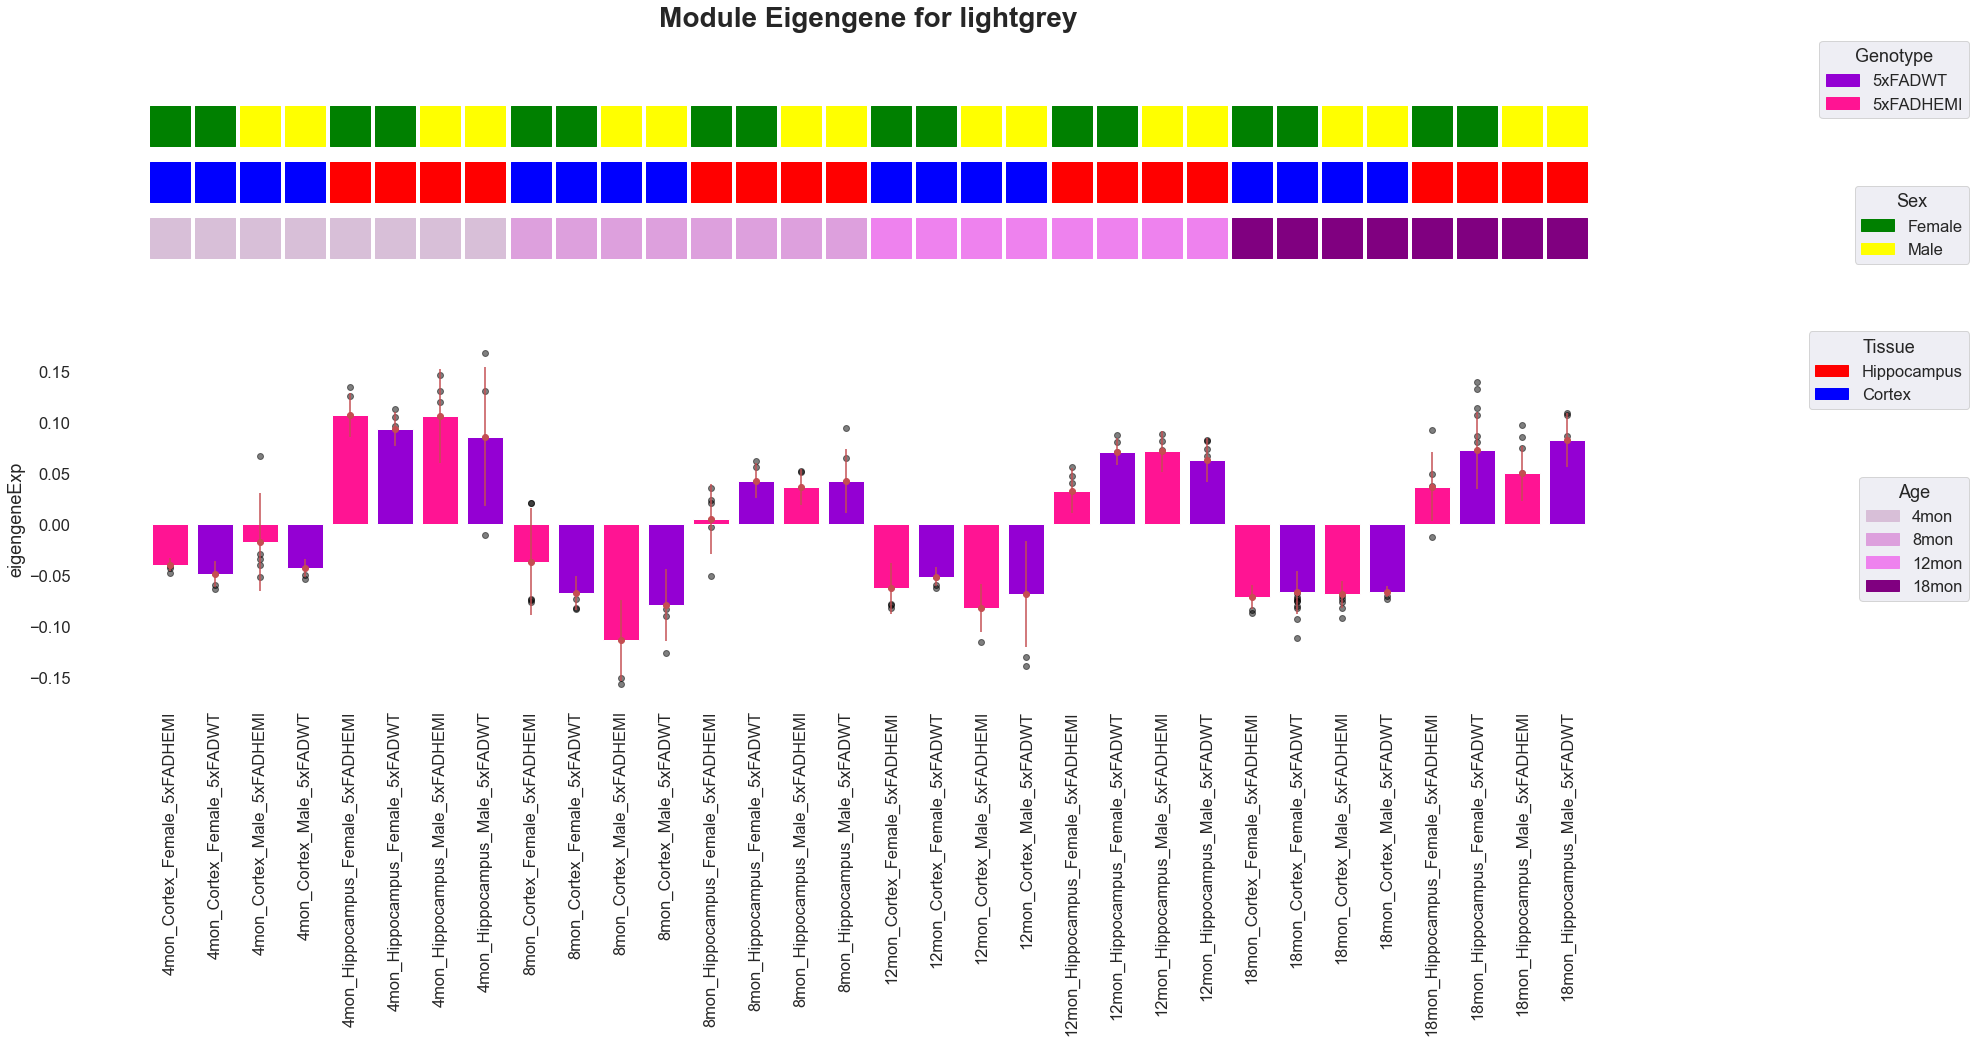

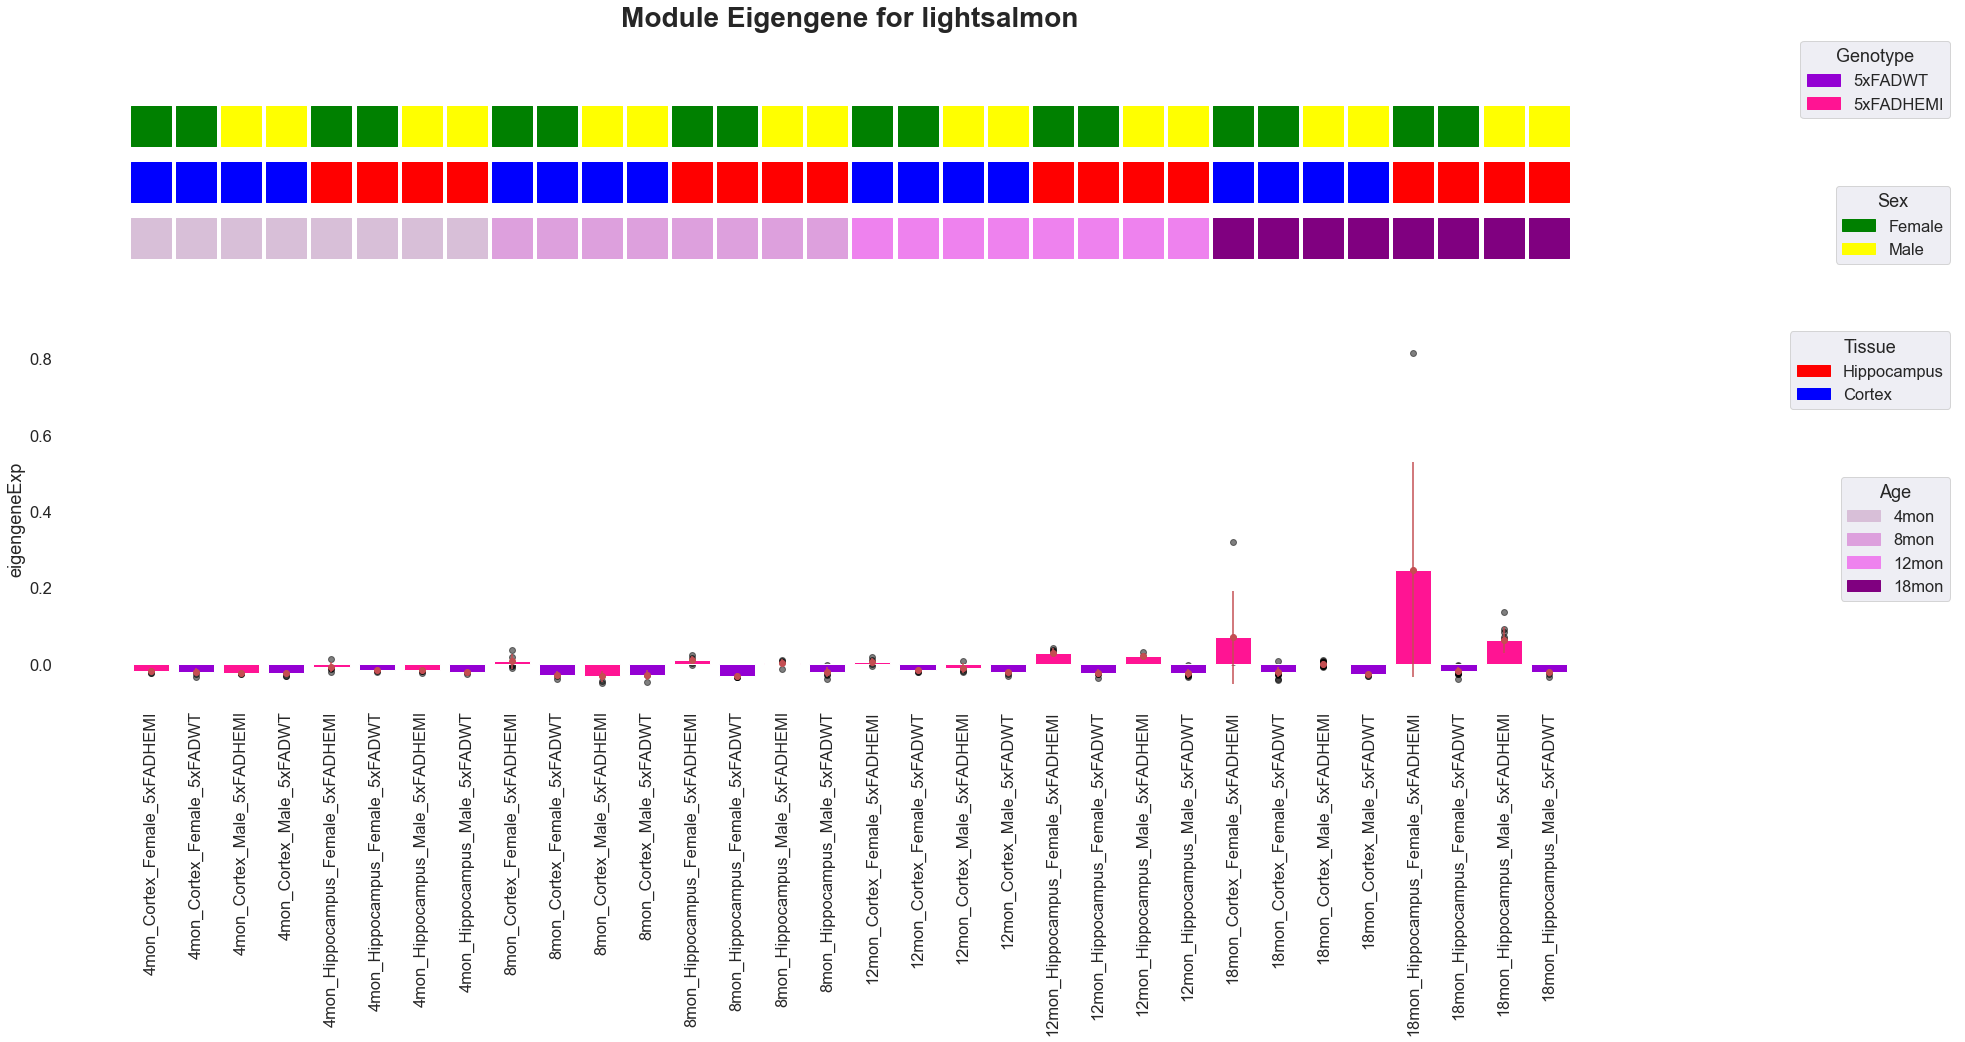

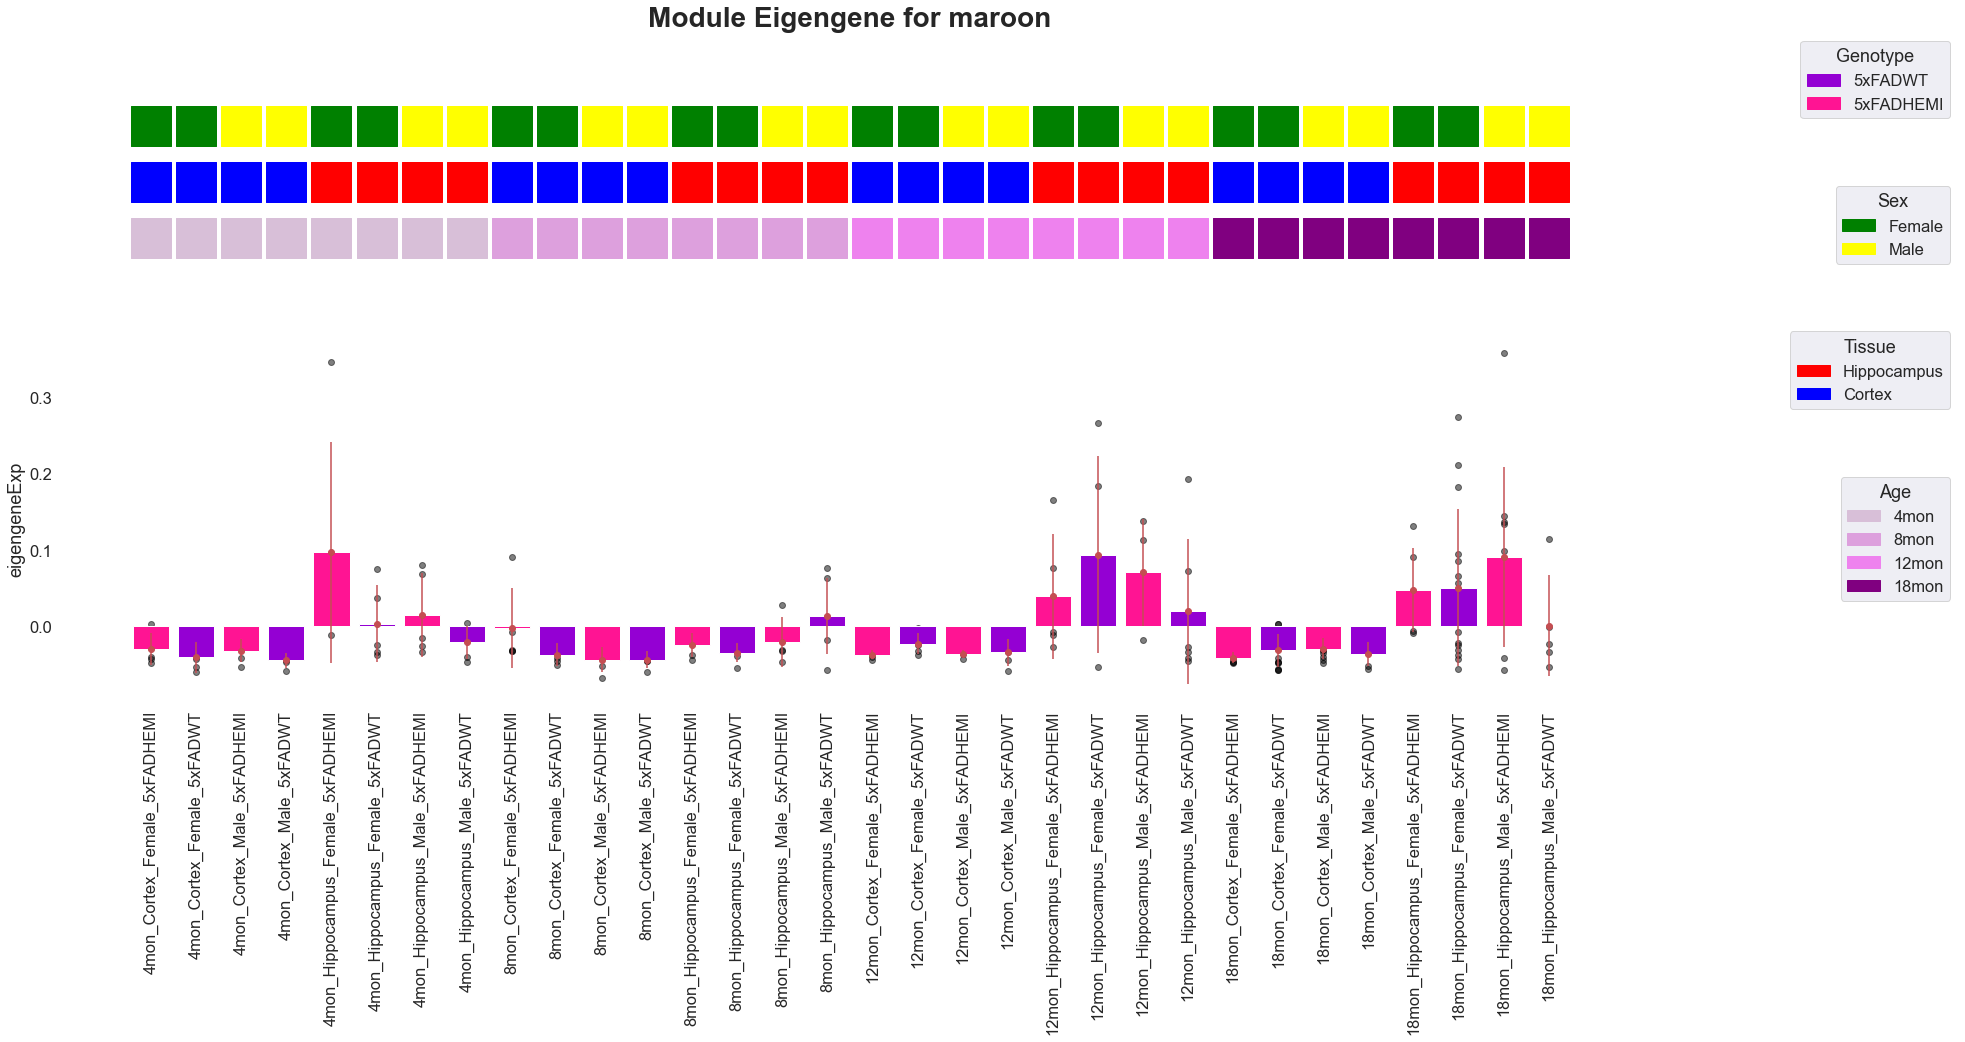

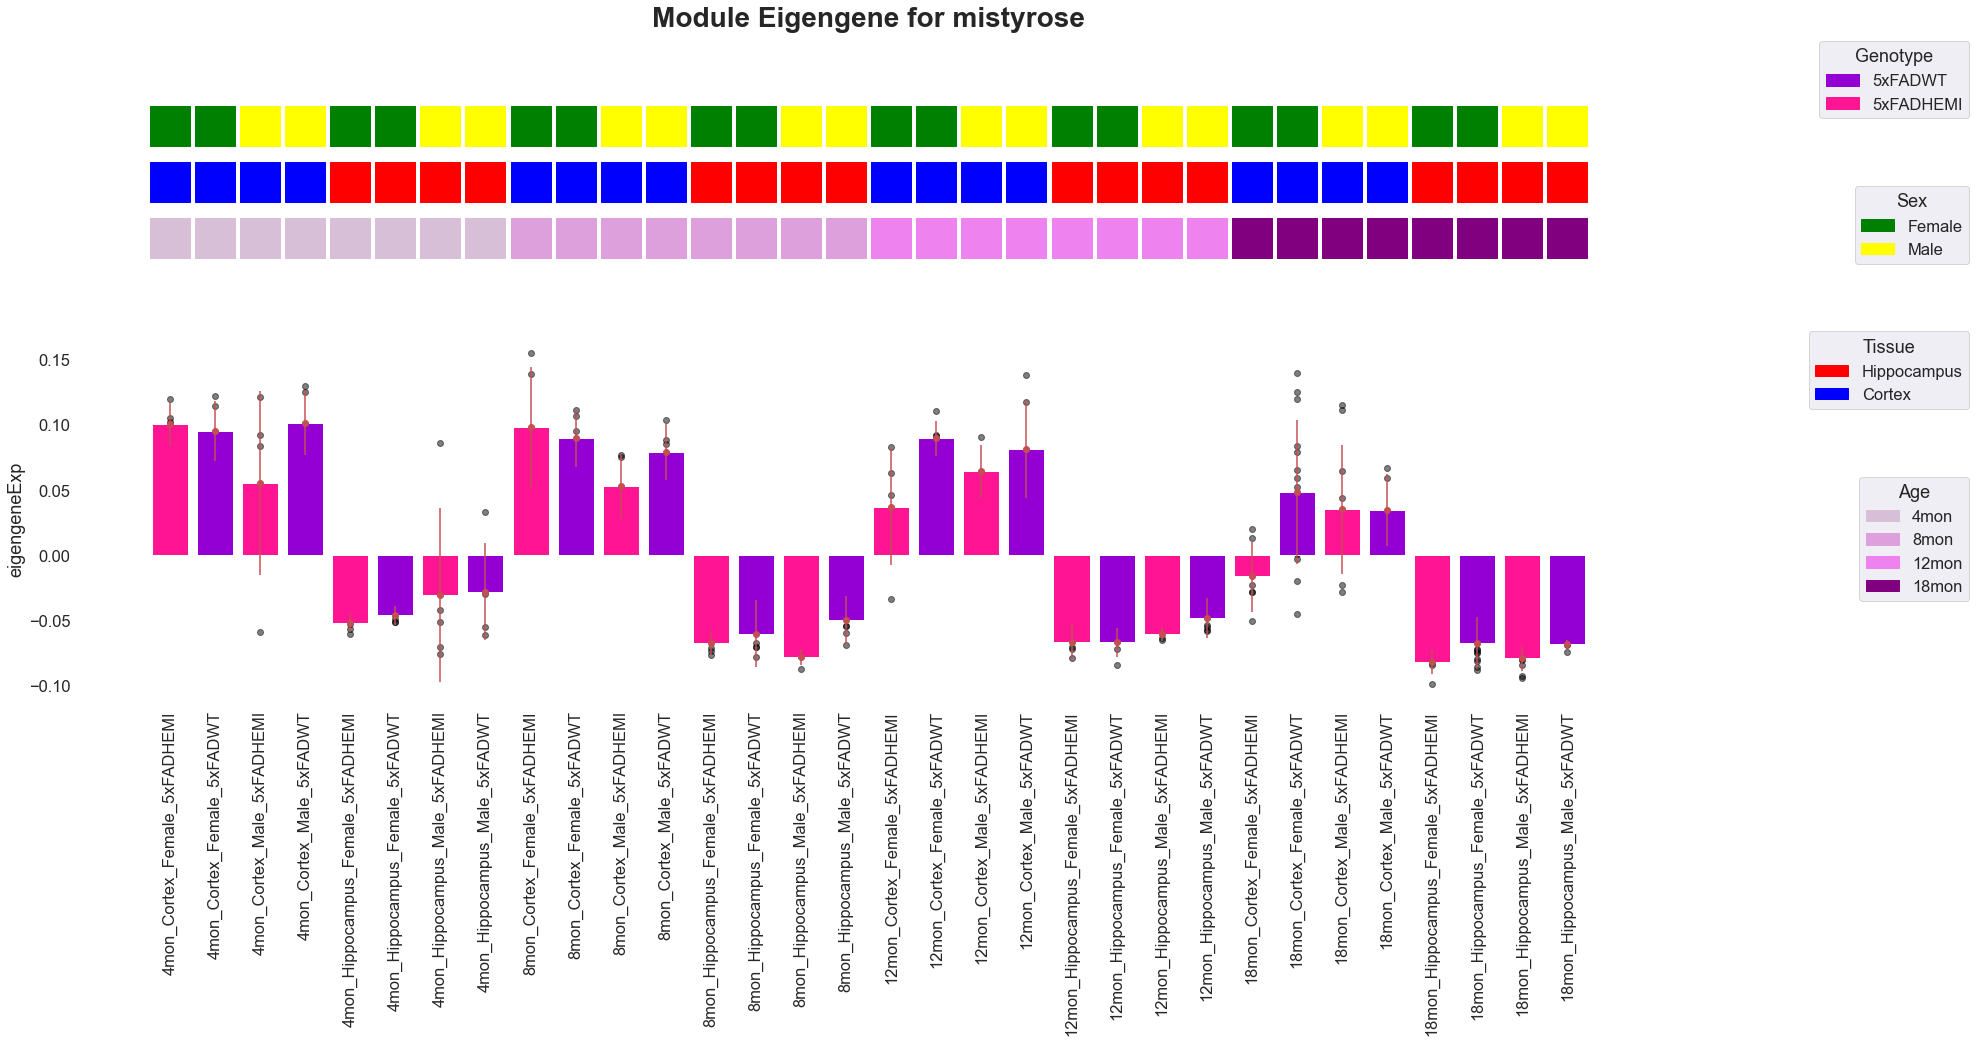

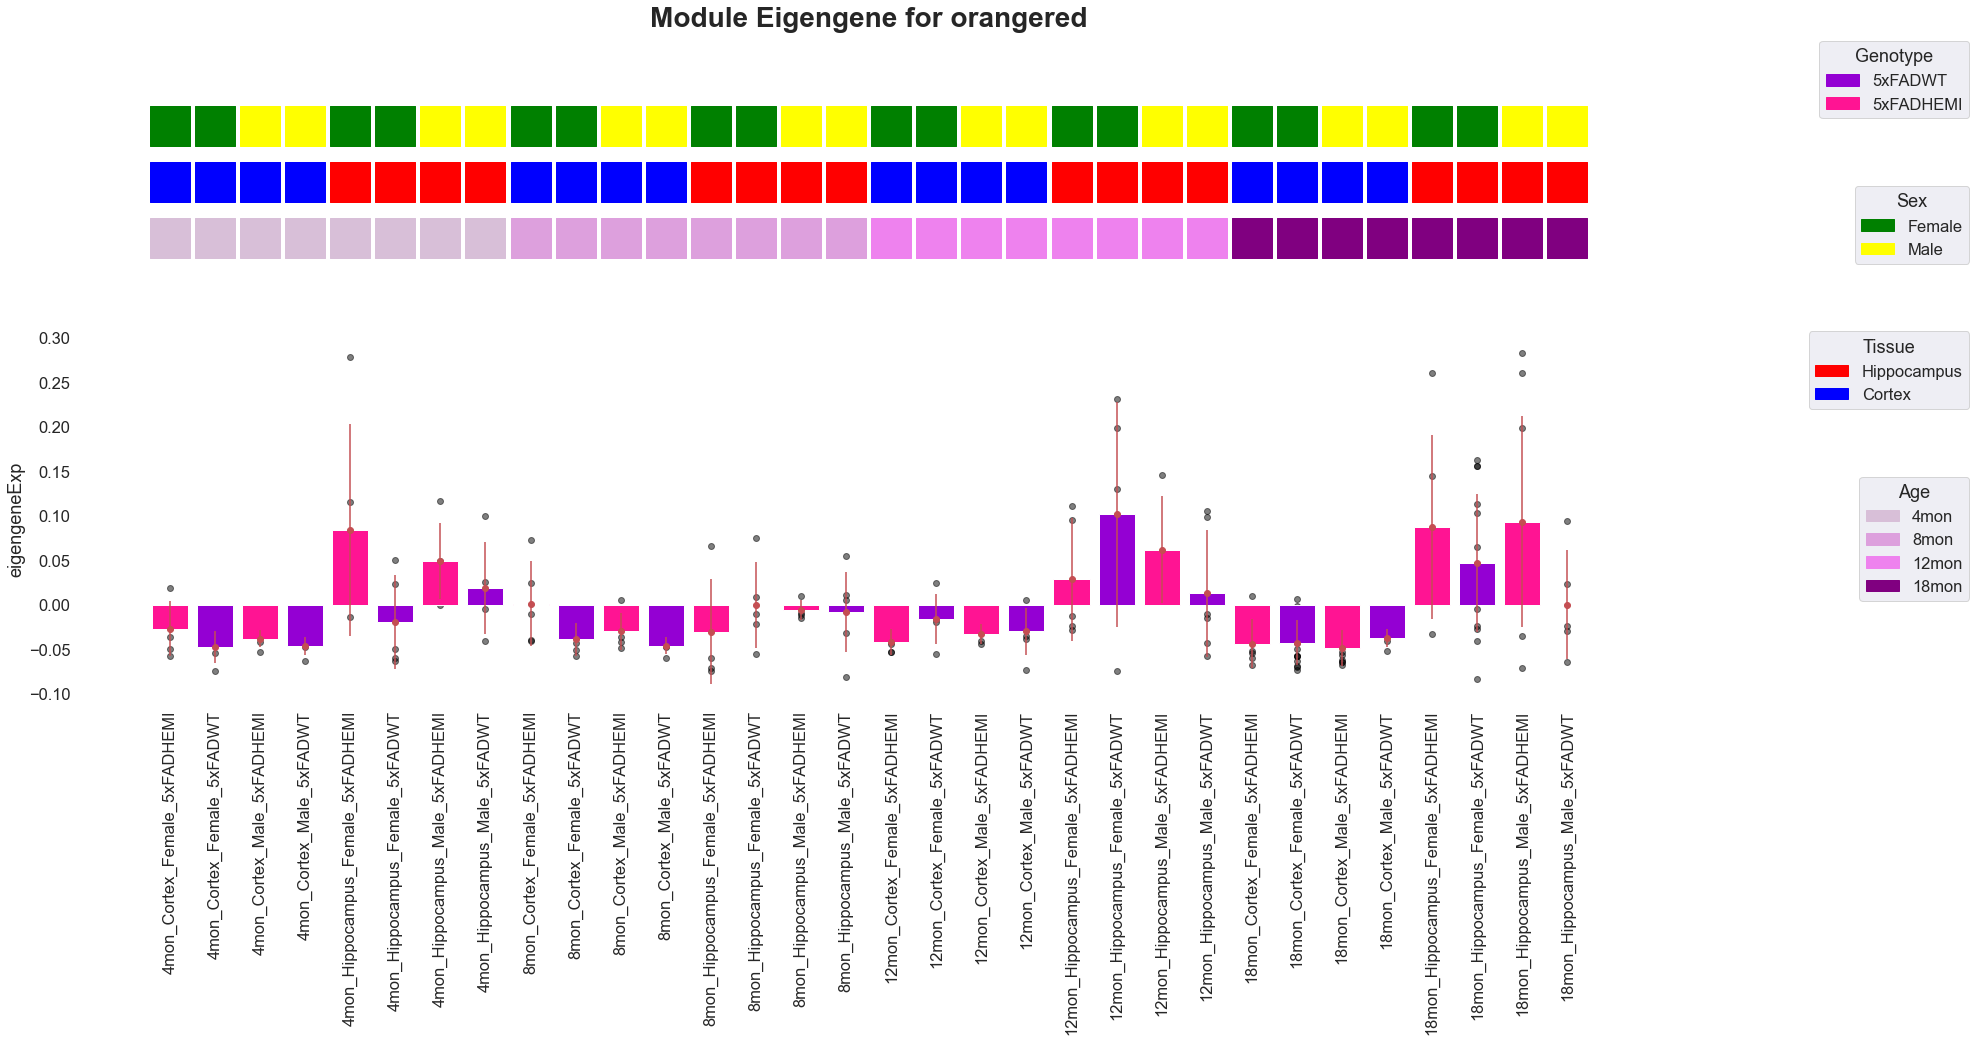

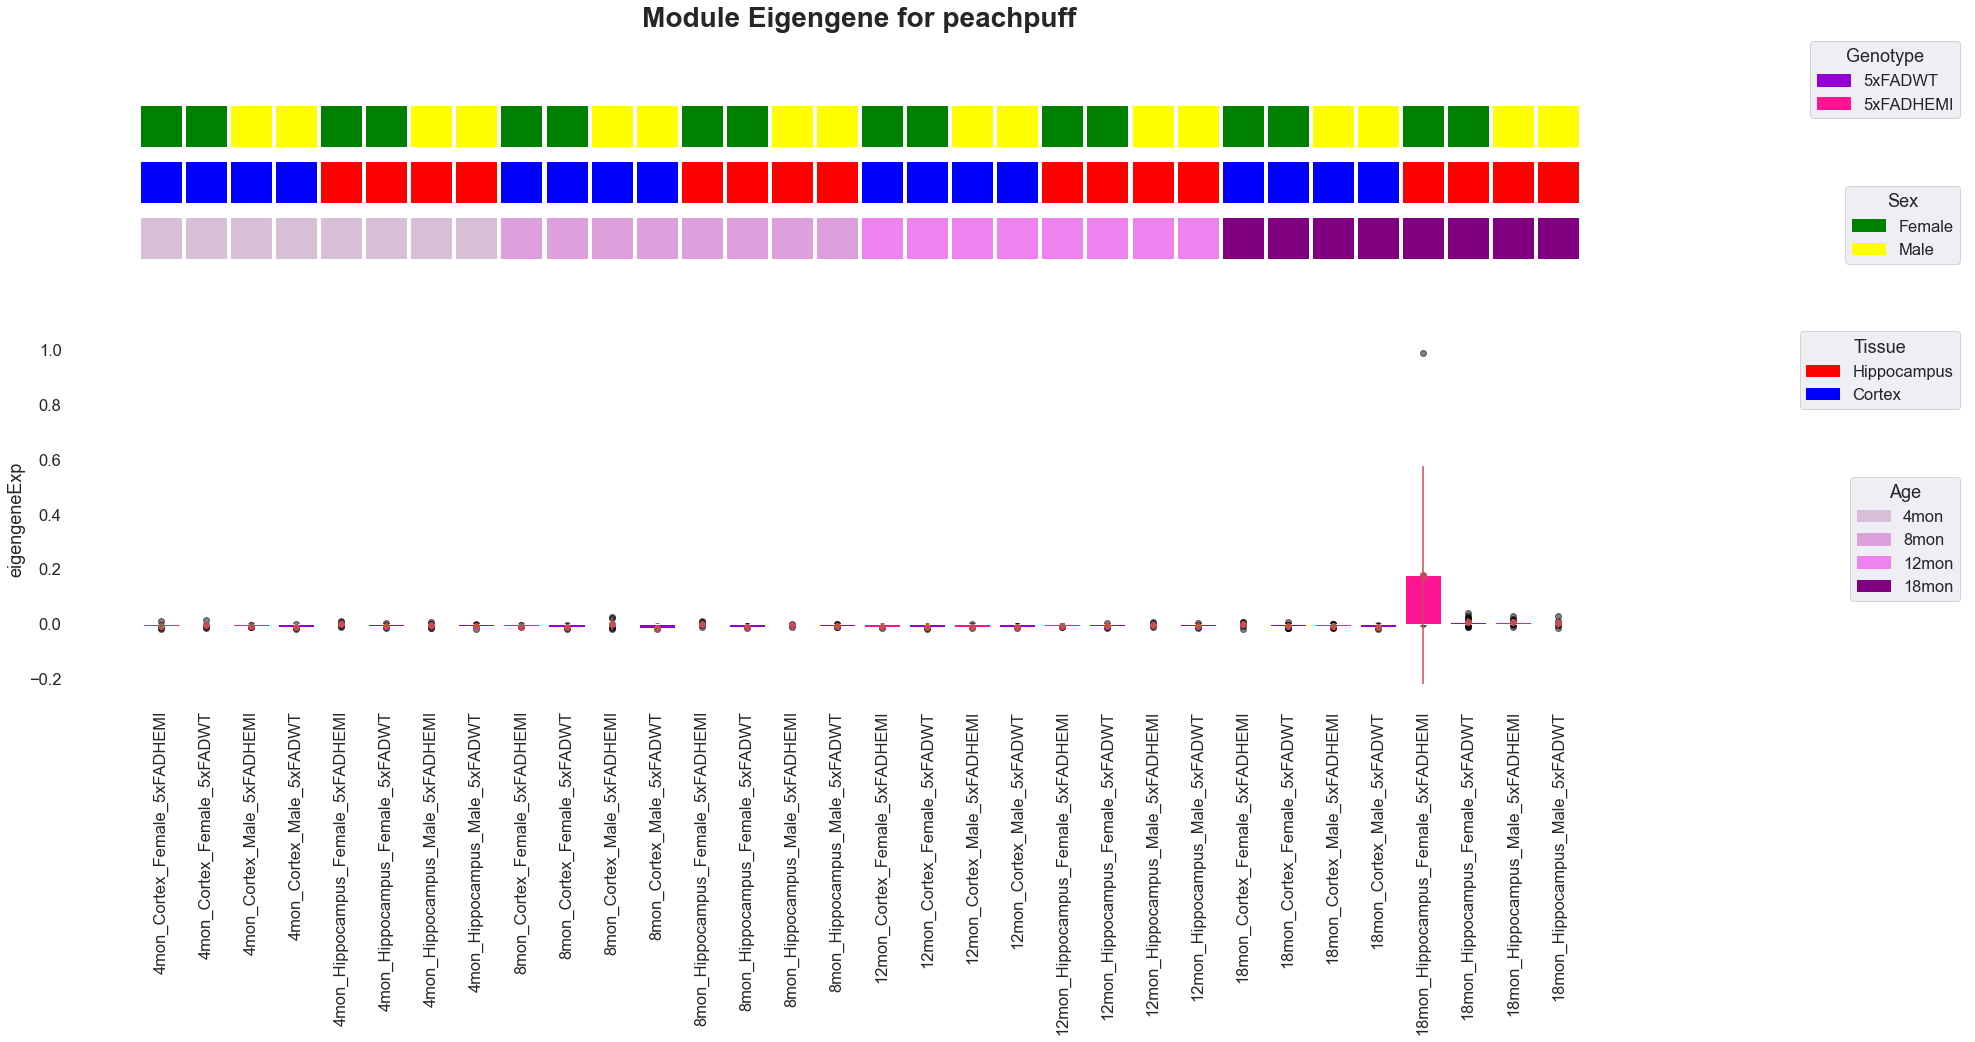

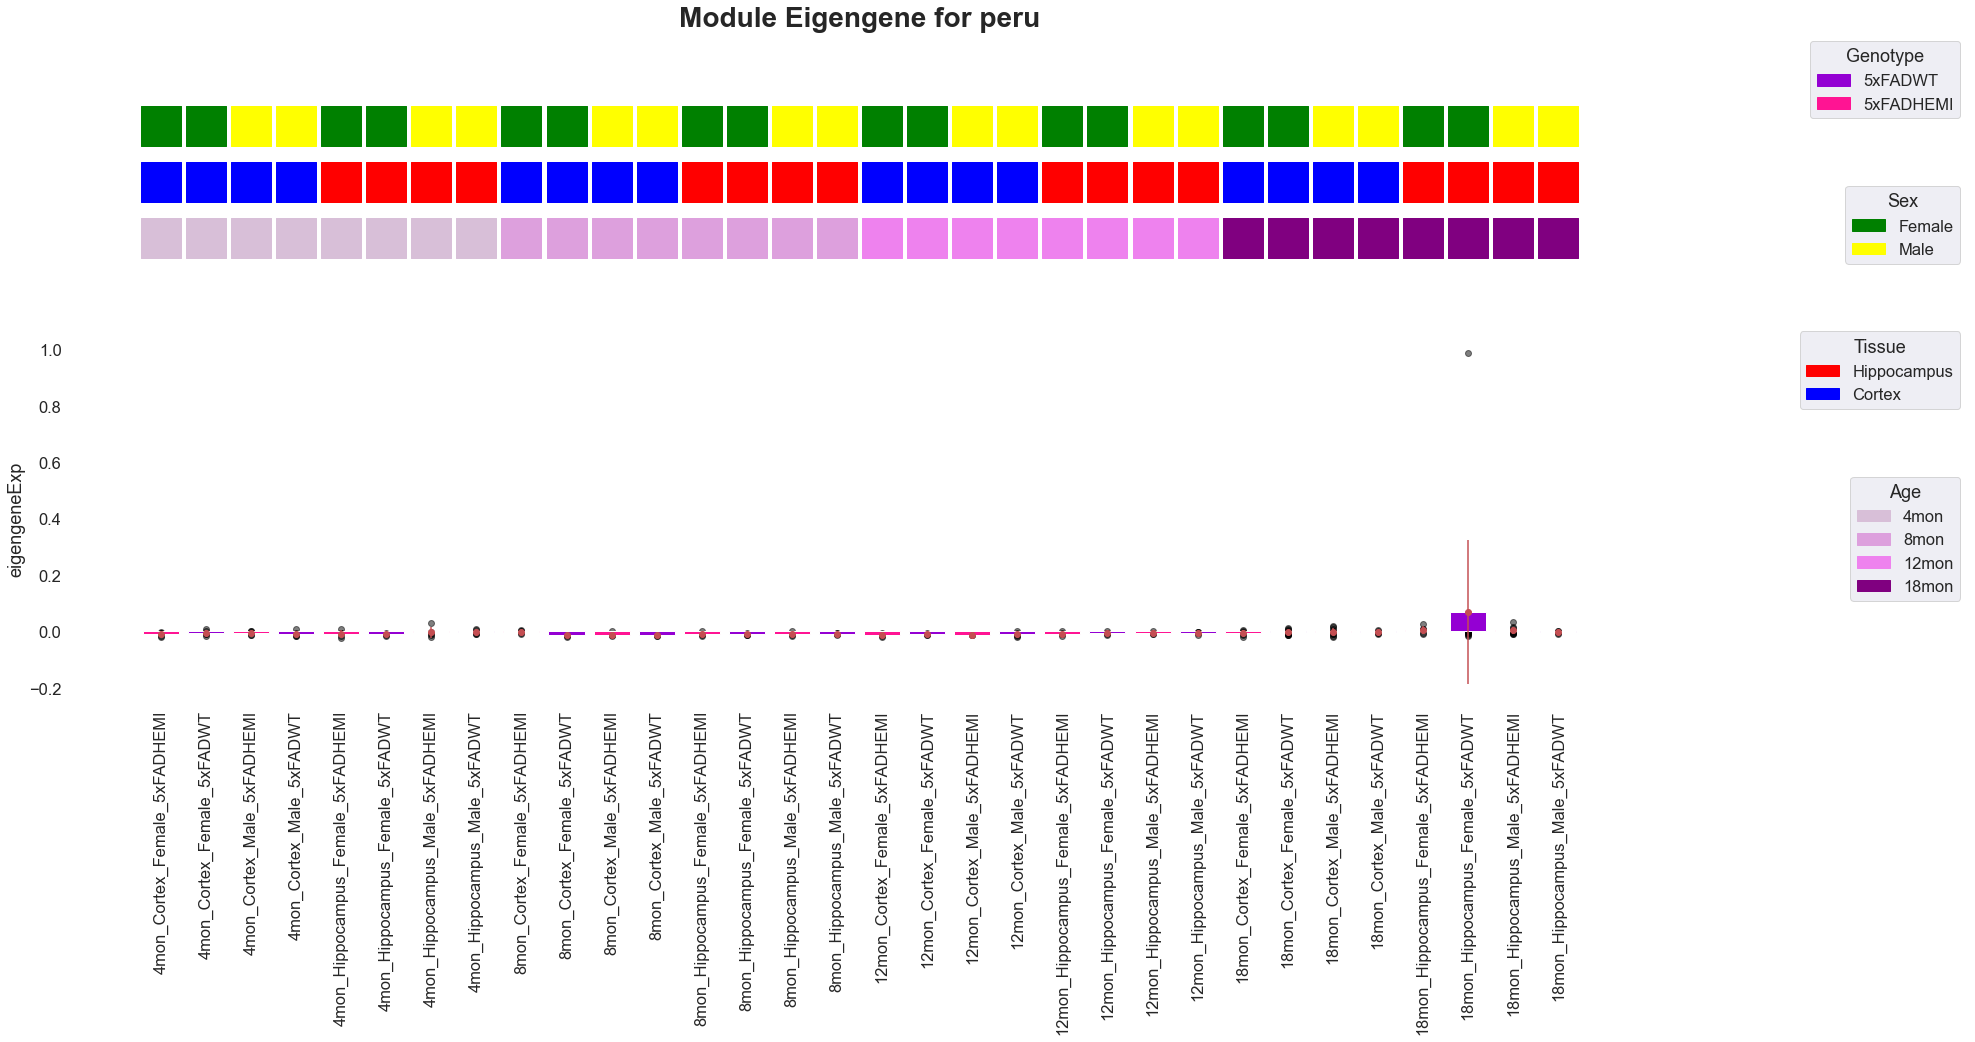

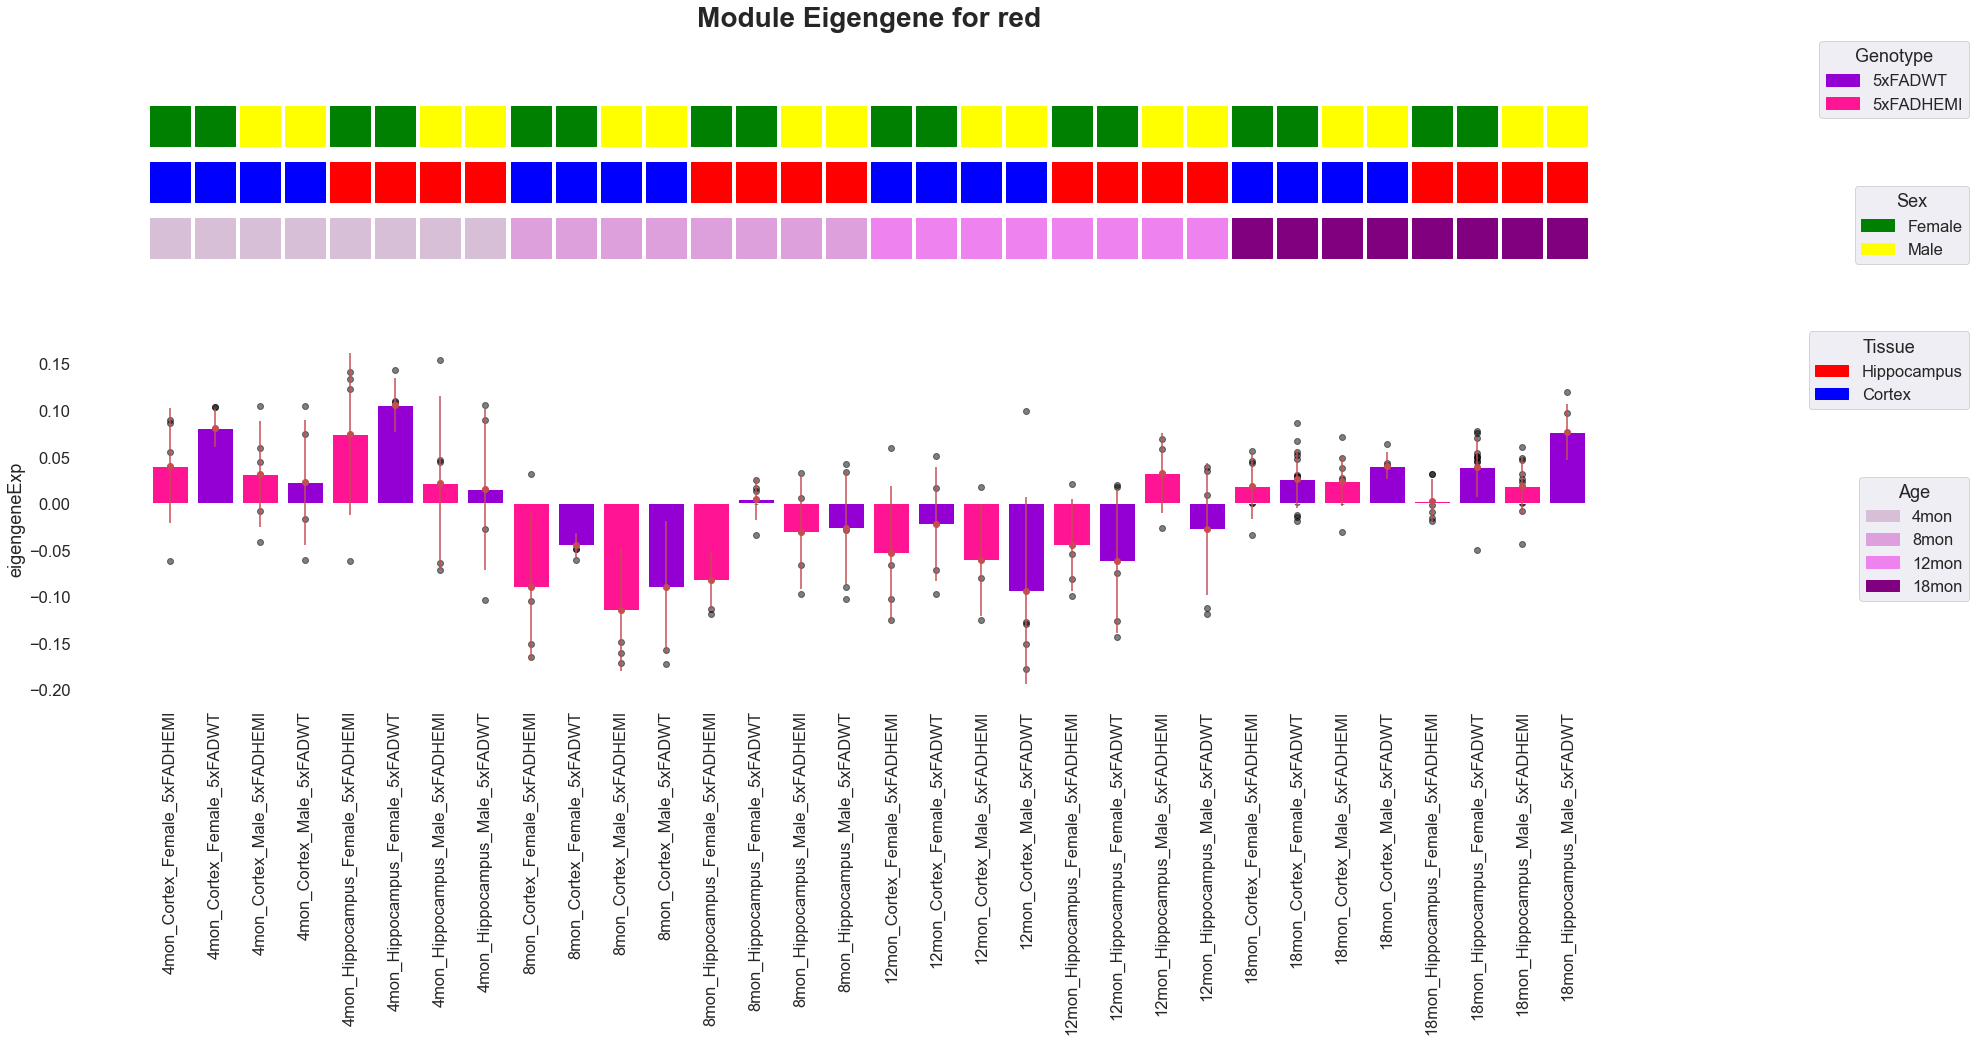

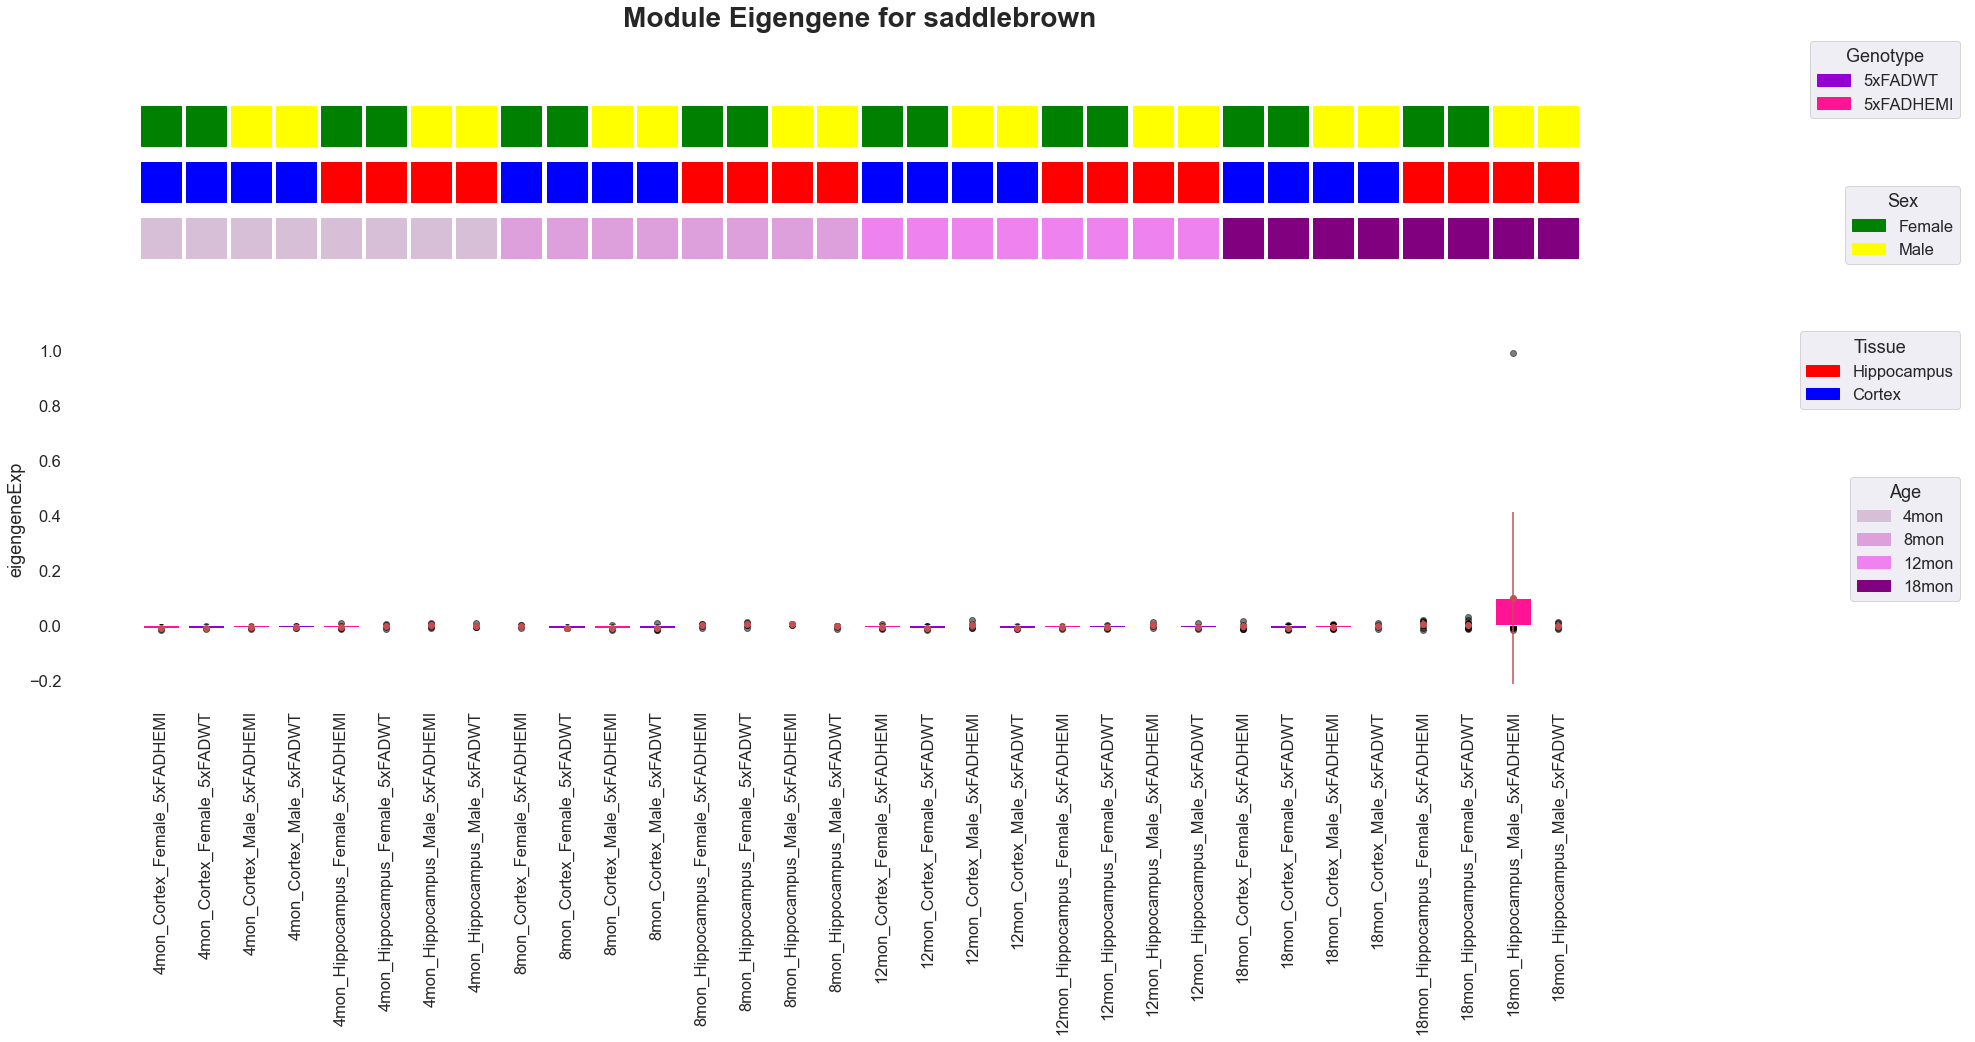

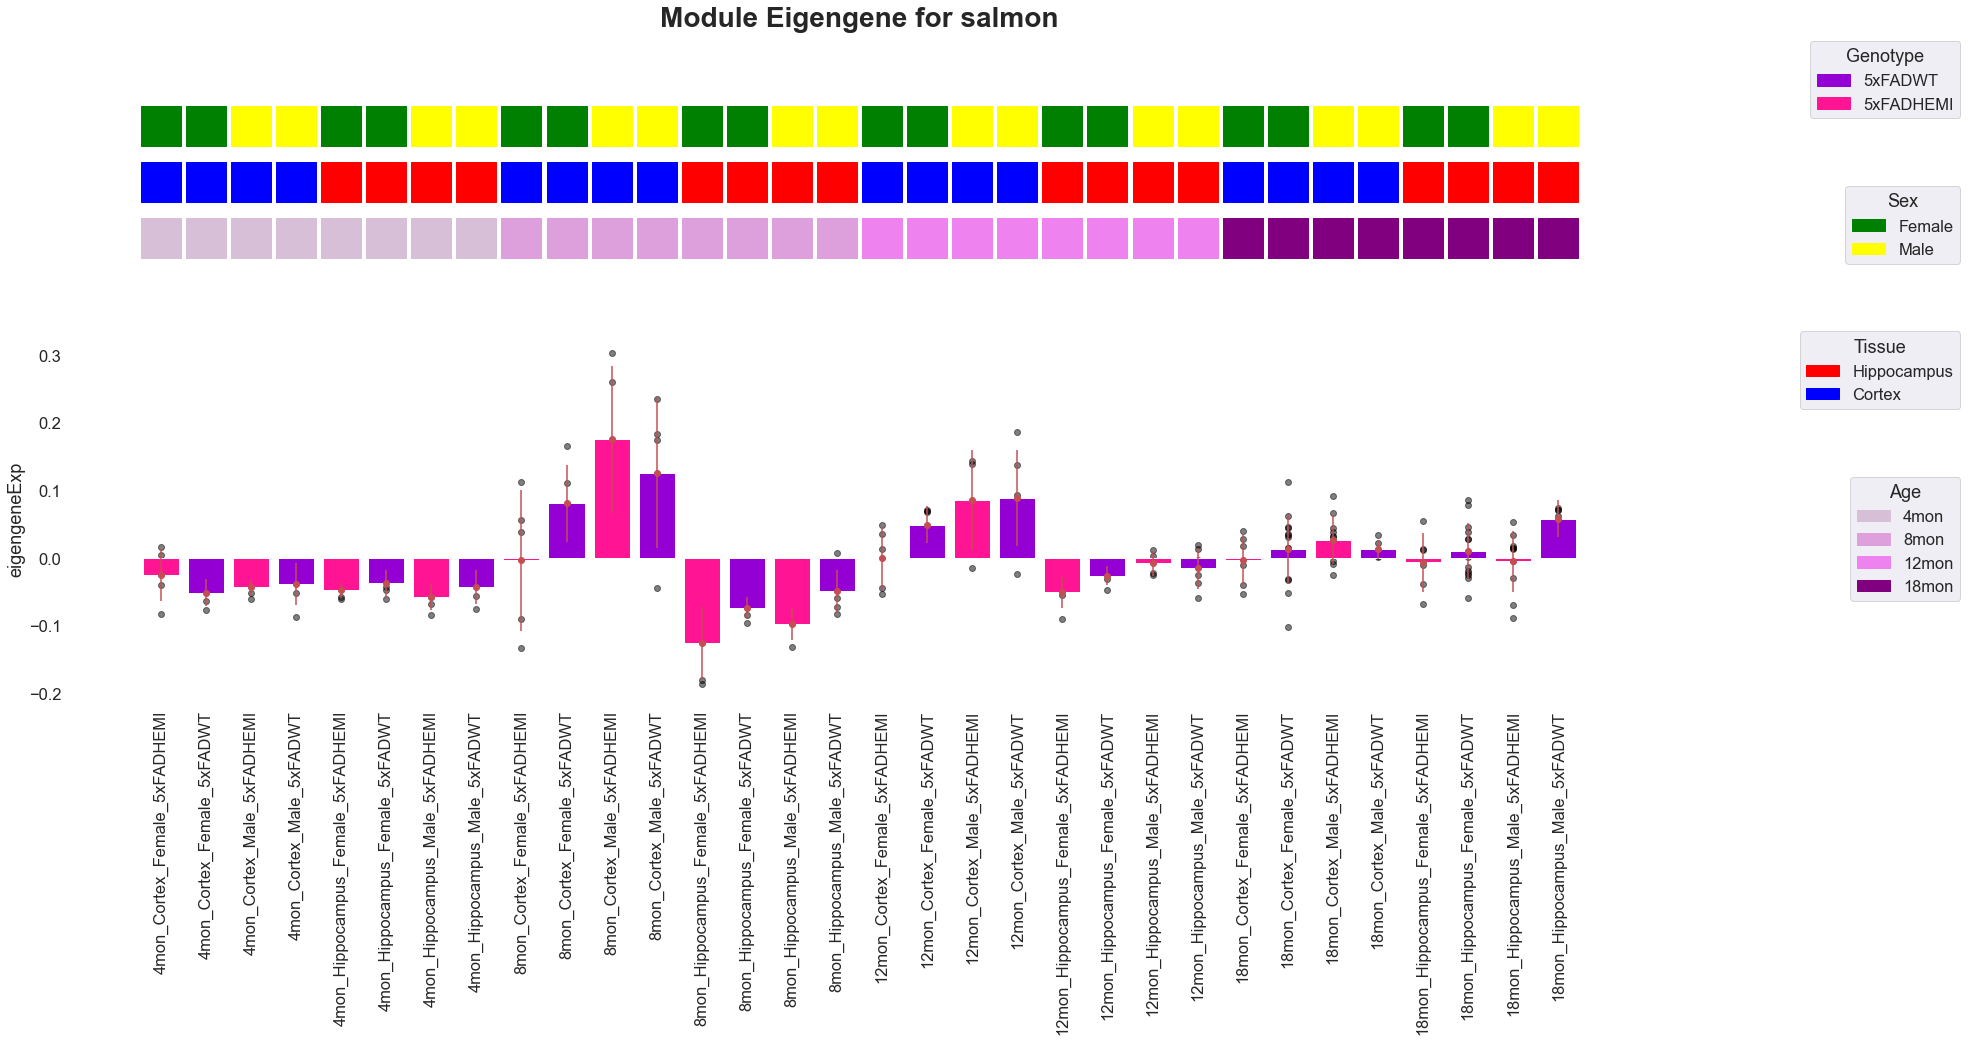

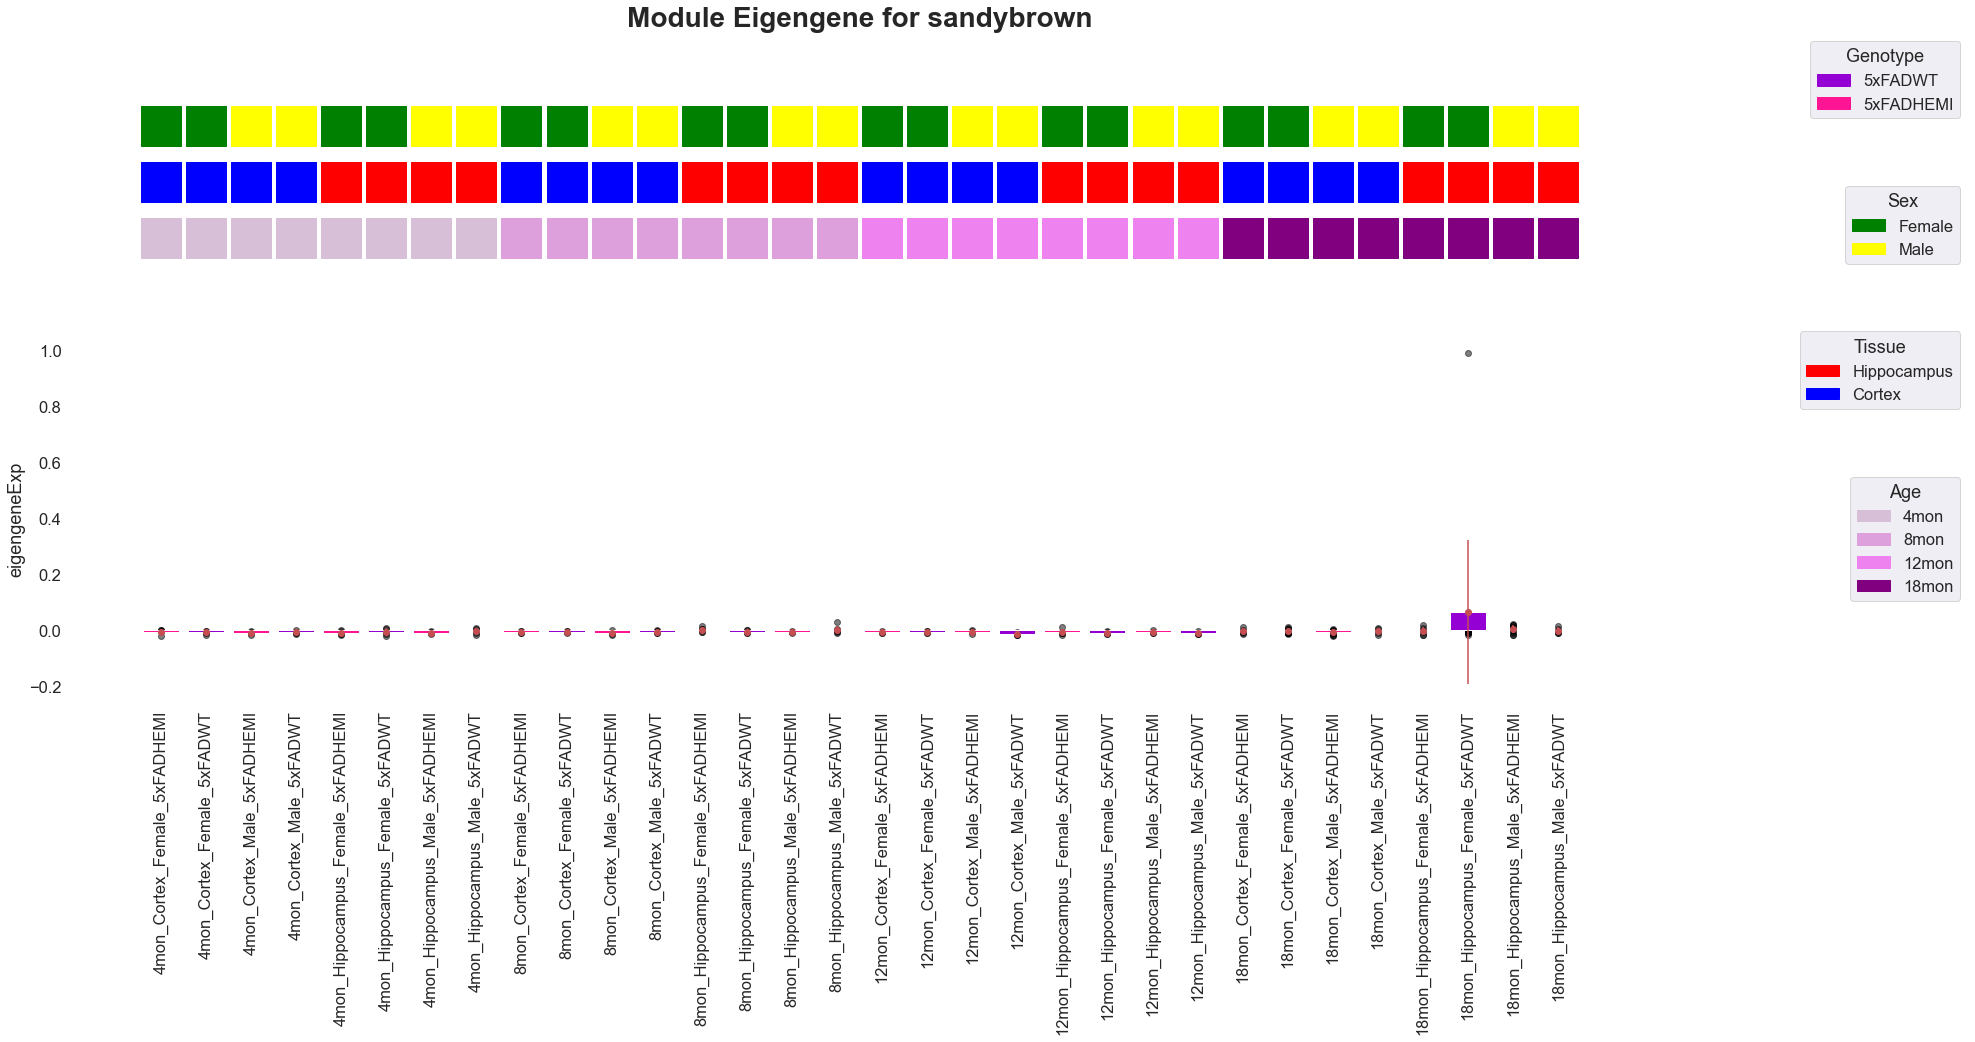

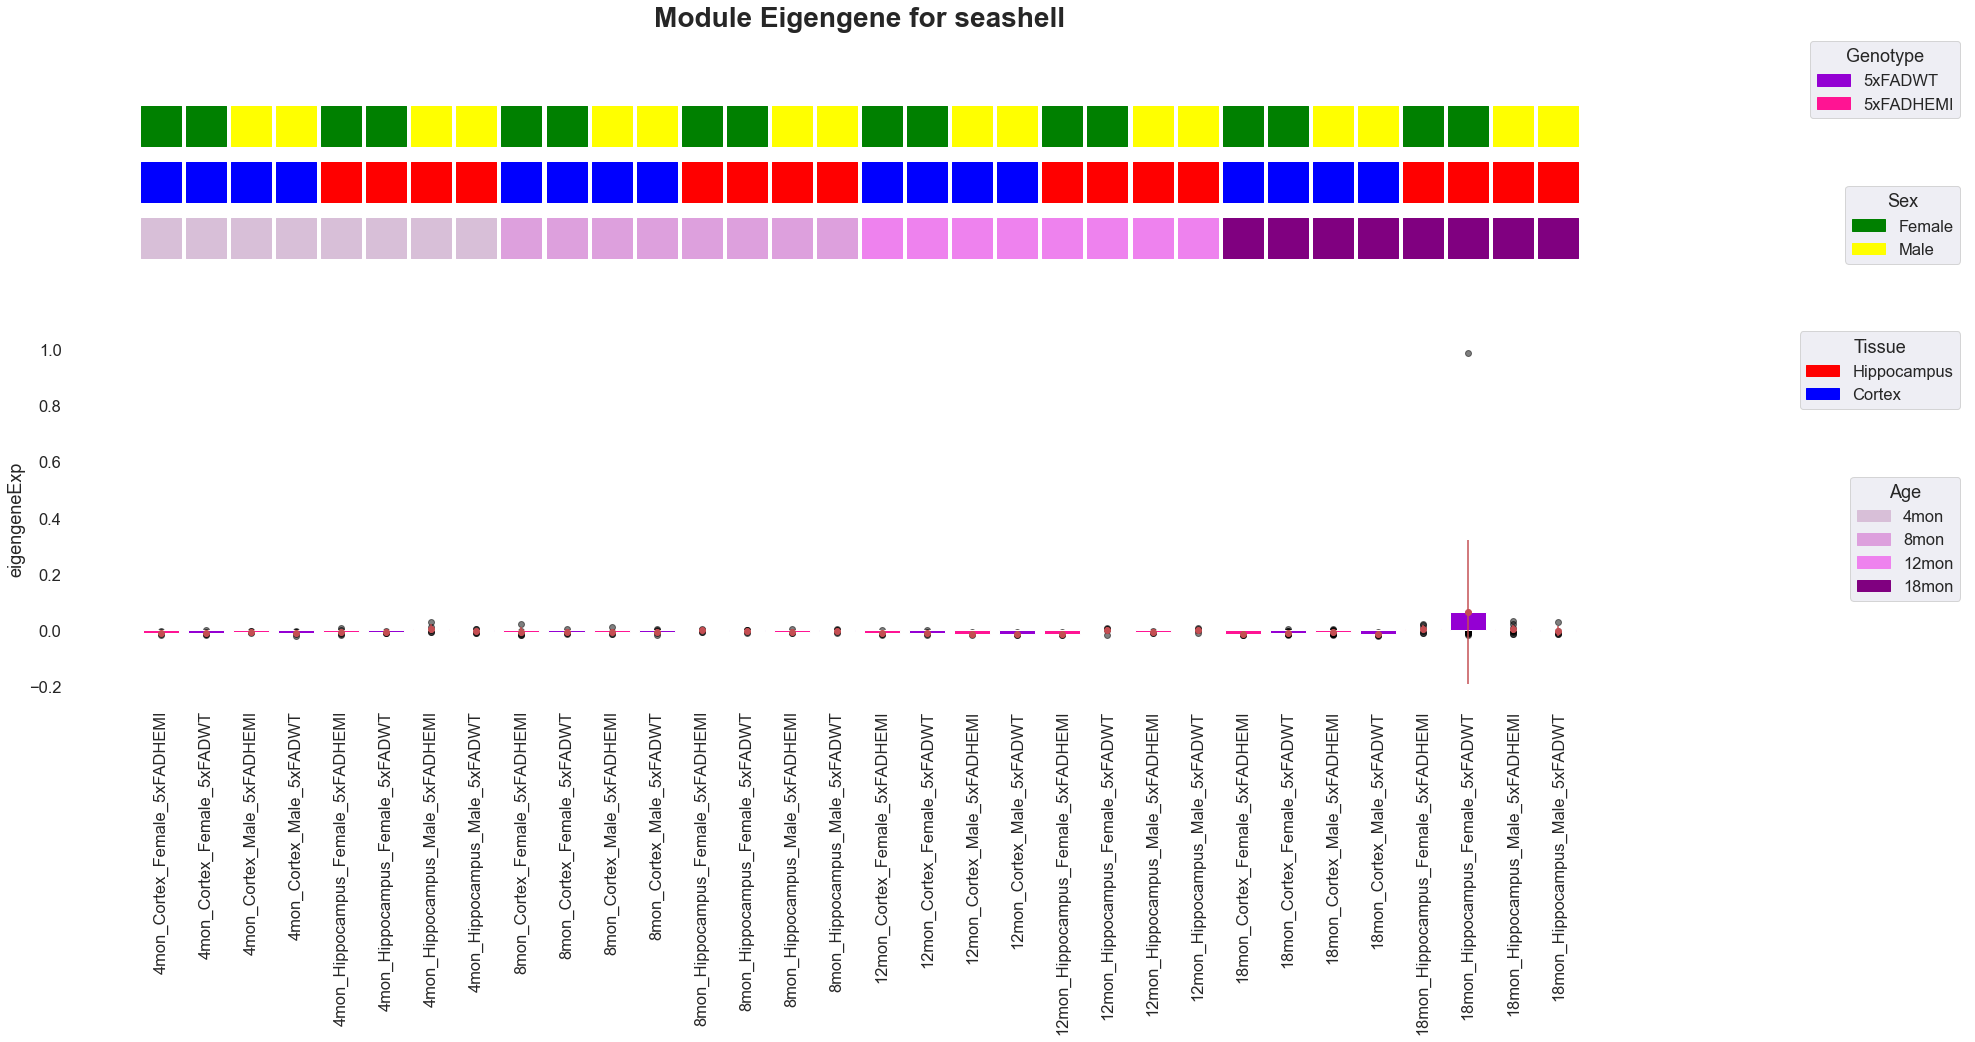

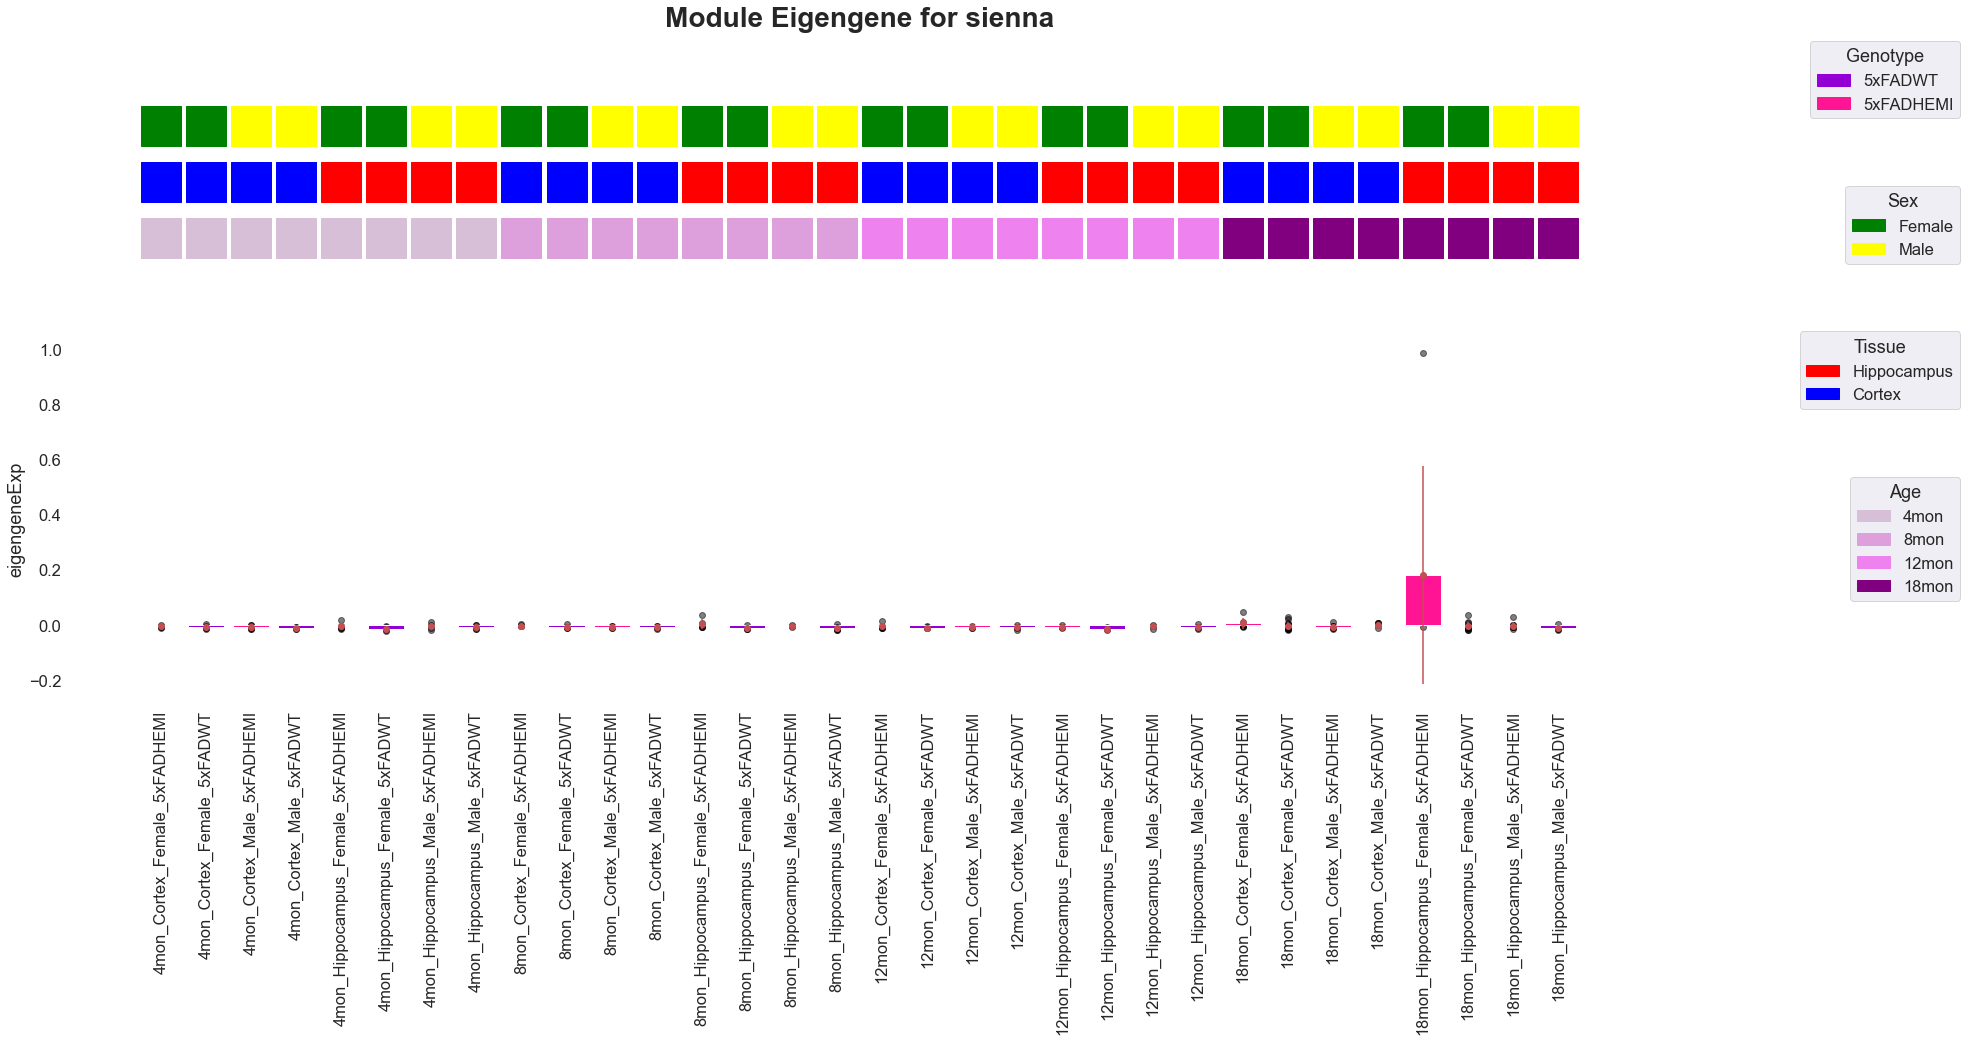

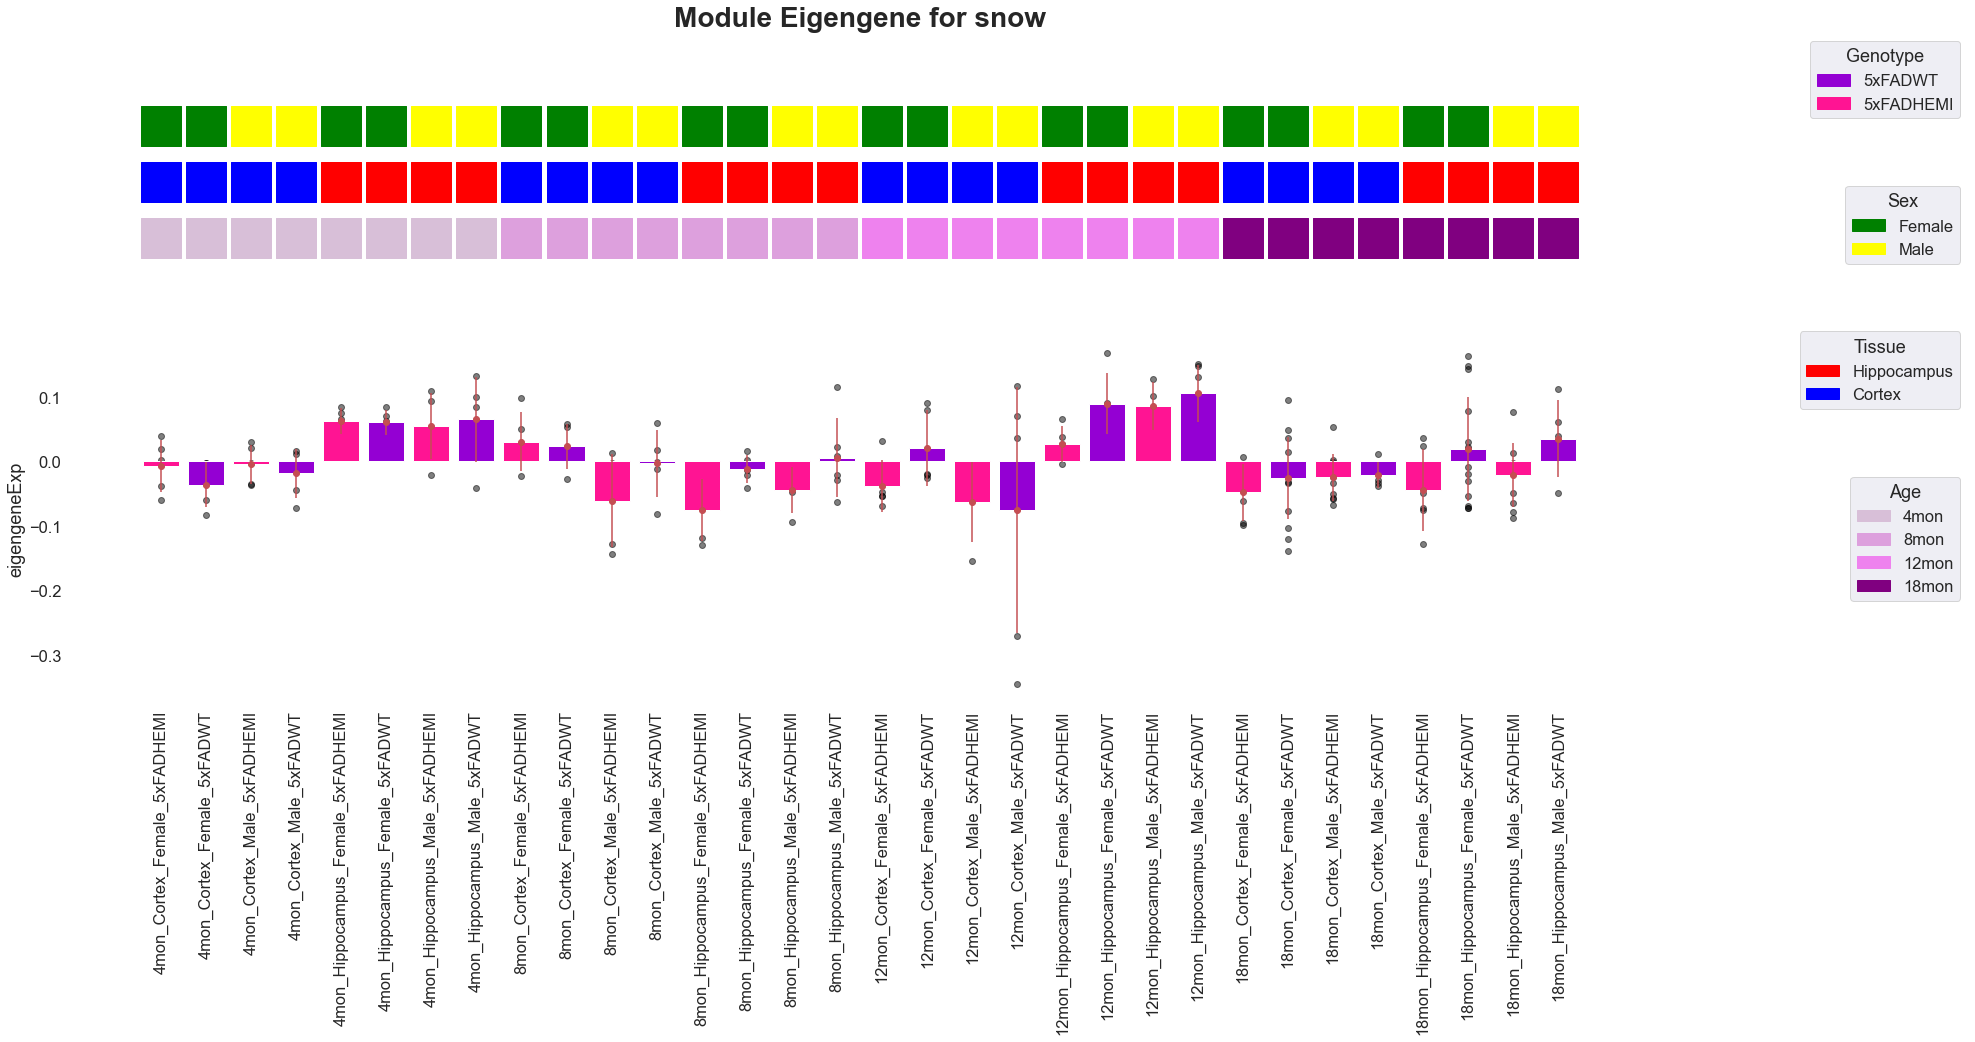

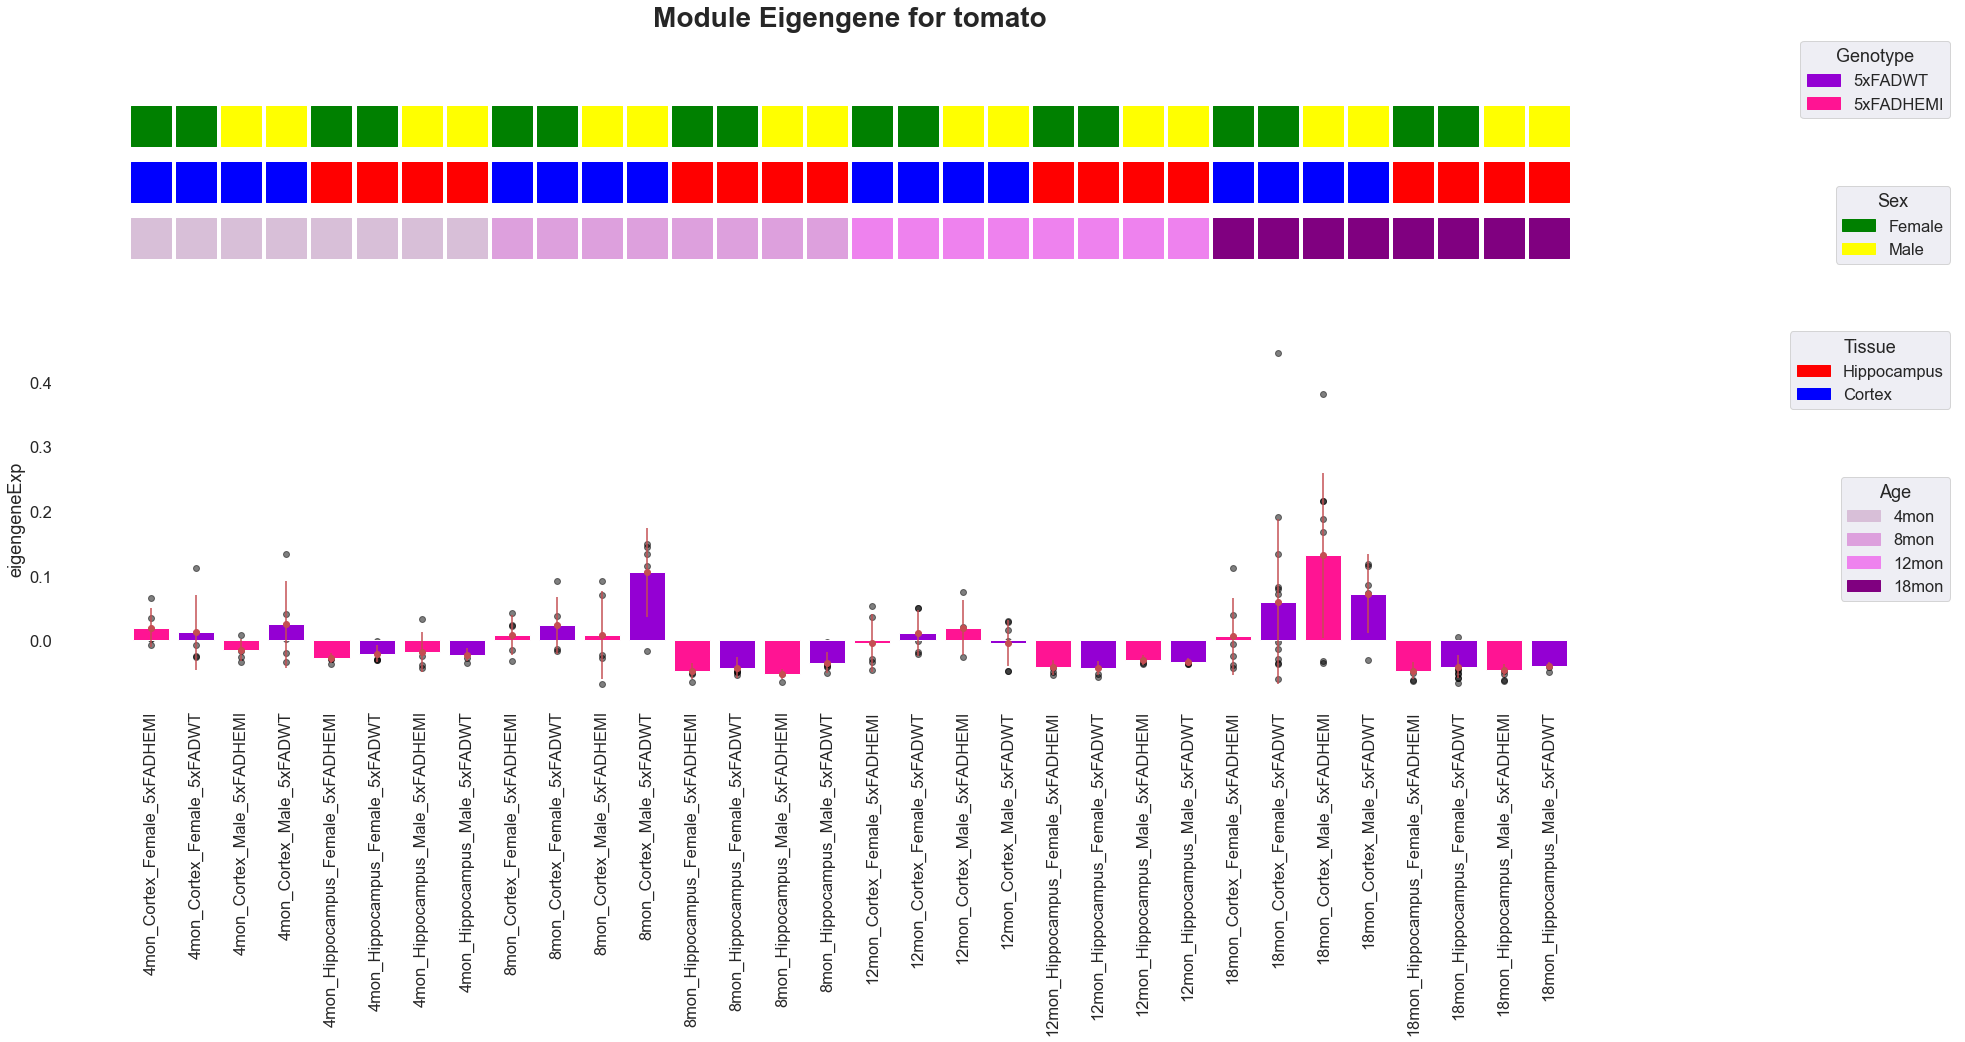

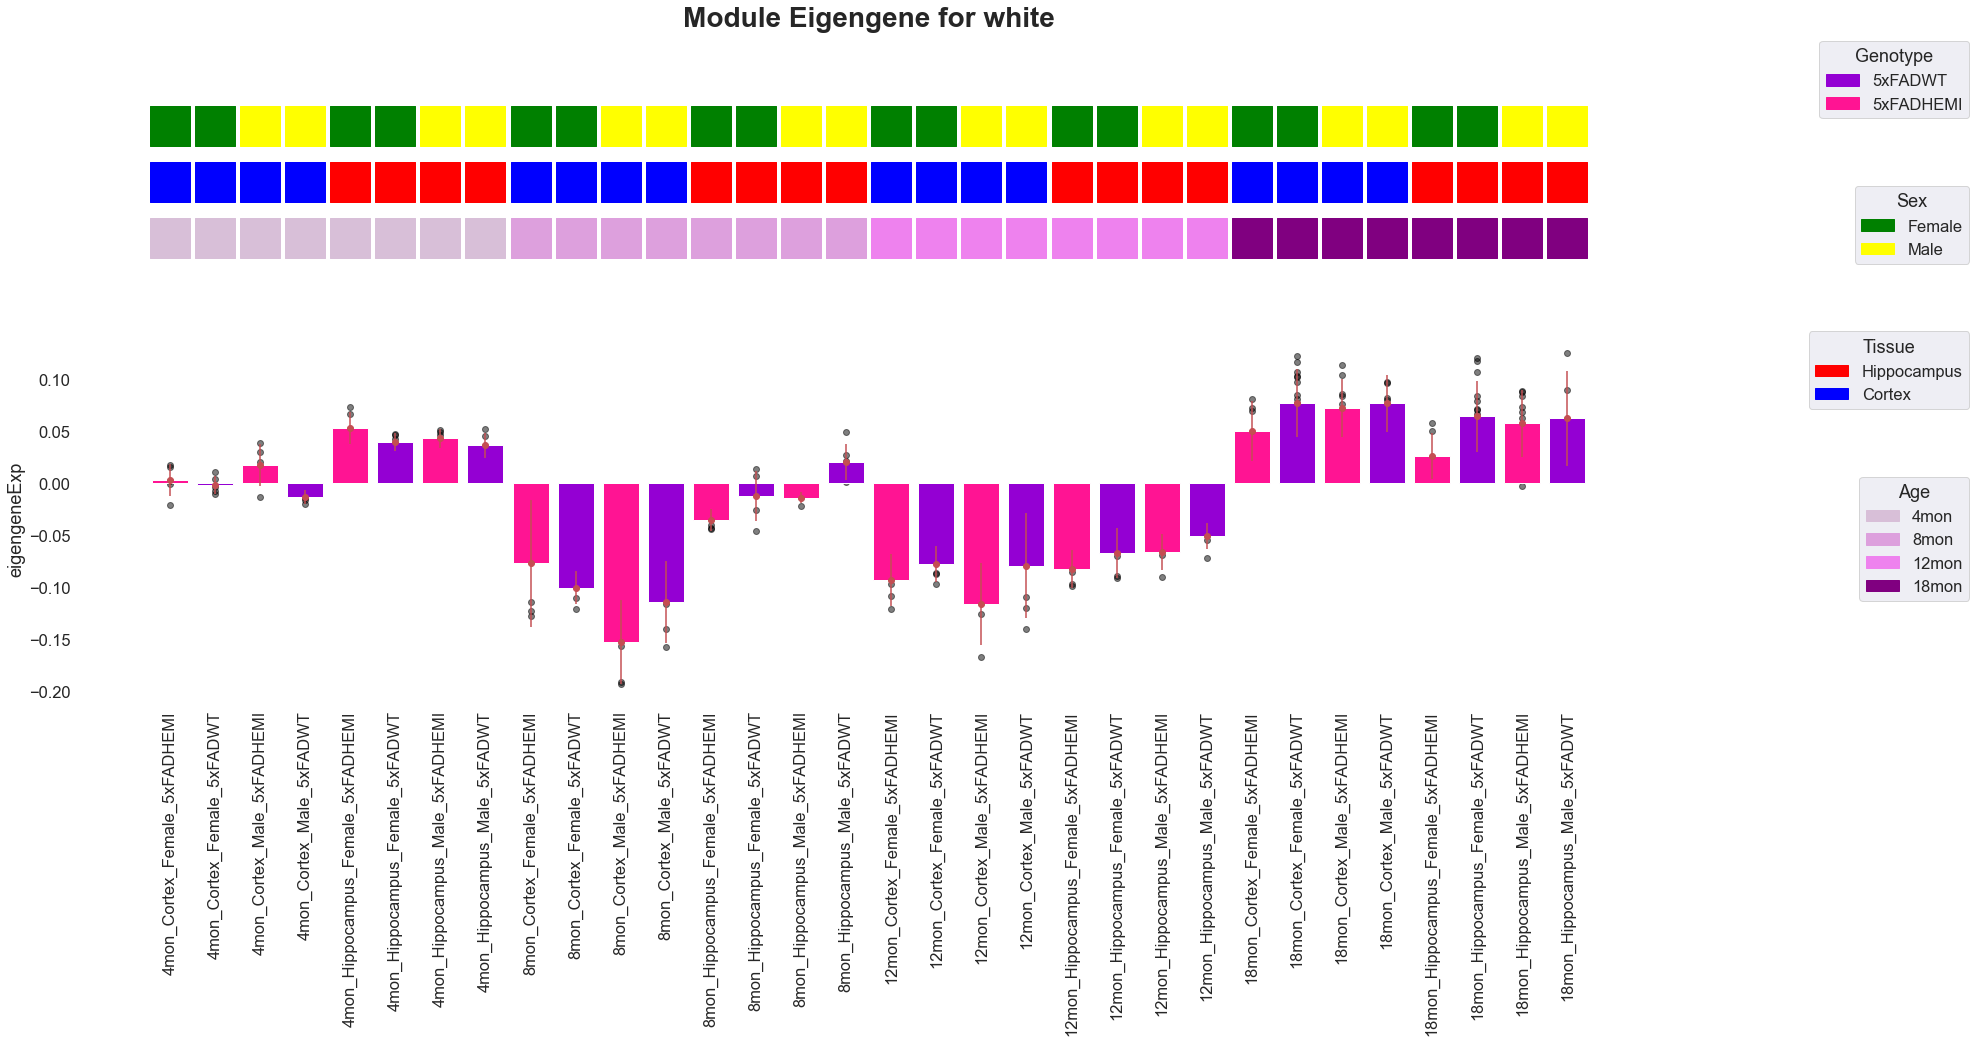

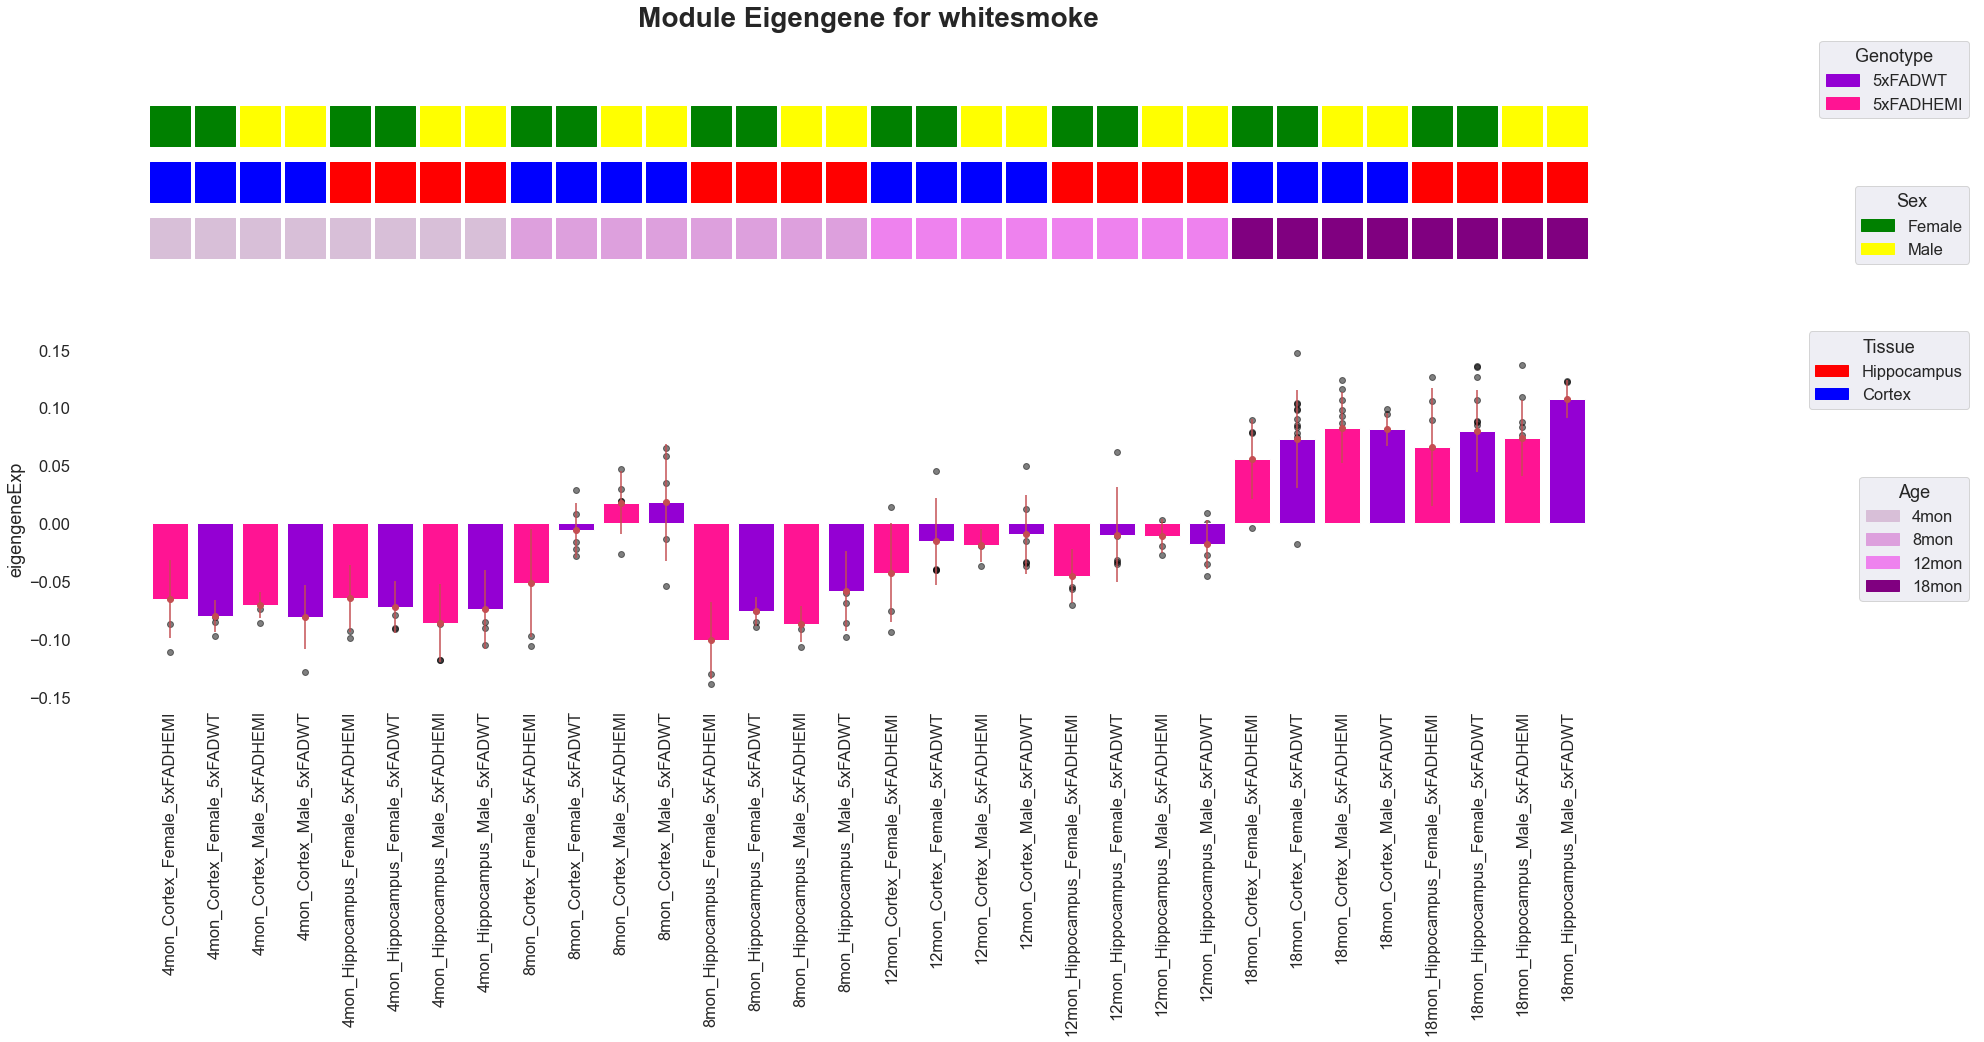

In [5]:
pyWGCNA_5xFAD.updateMetadata(path='5xFAD_paper/metaData', sep='\t')
# add color for metadata
pyWGCNA_5xFAD.setMetadataColor('Sex', {'Female': 'green',
                                       'Male': 'yellow'})
pyWGCNA_5xFAD.setMetadataColor('Genotype', {'5xFADWT': 'darkviolet',
                                            '5xFADHEMI': 'deeppink'})
pyWGCNA_5xFAD.setMetadataColor('Age', {'4mon': 'thistle',
                                       '8mon': 'plum',
                                       '12mon': 'violet',
                                       '18mon': 'purple'})
pyWGCNA_5xFAD.setMetadataColor('Tissue', {'Hippocampus': 'red',
                                          'Cortex': 'blue'})

geneList = PyWGCNA.getGeneList(dataset='mmusculus_gene_ensembl',
                               attributes=['ensembl_gene_id', 
                                           'external_gene_name', 
                                           'gene_biotype'])

pyWGCNA_5xFAD.analyseWGCNA(geneList=geneList)

## Saving and loading your PyWGCNA
you can save or load your PyWGCNA object with `saveWGCNA()` or `readWGCNA()` function.

In [6]:
pyWGCNA_5xFAD.saveWGCNA()

Saving WGCNA as 5xFAD.p


you can also load your PyWGCNA object with `readWGCNA()` function. you can download `5xFAD.p` from [Zendo](https://zenodo.org/record/6672453#.YrDS4LnMJhE).

In [1]:
import PyWGCNA
pyWGCNA_5xFAD = PyWGCNA.readWGCNA("5xFAD.p")

Reading 5xFAD WGCNA done!
